In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import json
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

code_dir = os.path.dirname(os.getcwd())
sys.path.append(code_dir)

from nmfp import audio_processing

import IPython.display as ipd

fs = 8000

fma_dir = "point_to_your_fma+dir"

datasets_dir = "../../datasets/"
fma_8k_dir = os.path.join(datasets_dir, "fma-wav_8khz_16bit", "audio")
nafp_dataset_dir  = os.path.join(datasets_dir, "neural-audio-fp-dataset")
nafp_pp_dataset_dir  = os.path.join(datasets_dir, "nafp_pp-dataset")

[   INFO   ] MusicExtractorSVM: no classifier models were configured by default


## Music of NAFP

In [7]:
nafp_music_dir = os.path.join(nafp_dataset_dir, "music")

nafp_music_train_dir = os.path.join(nafp_music_dir, "train")
nafp_music_train_paths = sorted(glob(os.path.join(nafp_music_train_dir, "**/*.wav"), recursive=True))

# We deleted these files to save disk space
# test_dummy_dir = os.path.join(nafp_music_dir, "test-dummy-db-100k-full") #/from_fma_large10k-30s_for_mini/
# test_dummy_paths = glob(os.path.join(test_dummy_dir, "**/*.wav"), recursive=True)
# print(len(test_dummy_paths))

nafp_music_test_query_dir = os.path.join(nafp_music_dir, "test-query-db-500-30s")

nafp_music_db_dir = os.path.join(nafp_music_test_query_dir, "db")
nafp_music_db_paths = sorted(glob(os.path.join(nafp_music_db_dir, "**/*.wav"), recursive=True))
print(len(nafp_music_db_paths))

nafp_music_query_dir = os.path.join(nafp_music_test_query_dir, "query")
nafp_music_query_paths = sorted(glob(os.path.join(nafp_music_query_dir, "**/*.wav"), recursive=True))
print(len(nafp_music_query_paths))

nafp_music_query_fixed_dir = os.path.join(nafp_music_test_query_dir, "query_fixed_SNR")
nafp_music_query_fixed_paths = sorted(glob(os.path.join(nafp_music_query_fixed_dir, "**/*.wav"), recursive=True))
print(len(nafp_music_query_fixed_paths))

500
500
1000


In [3]:
# i = 400

# path = db_paths[i]
# print(path)
# ipd.display(ipd.Audio(path))

# path = query_paths[i]
# print(path)
# ipd.display(ipd.Audio(path))

## Background Noise Data

### NAFP

In [2]:
nafp_bg_dir = os.path.join(nafp_dataset_dir, "aug", "bg")

nafp_bg_tr_dir = os.path.join(nafp_bg_dir, "tr")
nafp_bg_tr_paths = glob(os.path.join(nafp_bg_tr_dir, "*/*.wav"))
print(f"{len(nafp_bg_tr_paths)} BG Training files")

nafp_bg_ts_dir = os.path.join(nafp_bg_dir, "ts")
nafp_bg_ts_paths = glob(os.path.join(nafp_bg_ts_dir, "*/*.wav"))
print(f"{len(nafp_bg_ts_paths)} BG Testing files")

1246 BG Training files
310 BG Testing files


#### Quantitative Analysis

In [3]:
nafp_bg_tr_path_durations = []
for bg_path in nafp_bg_tr_paths:
    bg_audio = audio_processing.load_wav(bg_path, fs=fs)
    nafp_bg_tr_path_durations.append([bg_path, len(bg_audio)/fs])
nafp_bg_tr_path_durations = sorted(nafp_bg_tr_path_durations, key=lambda x: x[1])
nafp_bg_tr_path_durations = np.array([dur for _,dur in nafp_bg_tr_path_durations])
print(f"Min: {nafp_bg_tr_path_durations.min()} s, Max: {nafp_bg_tr_path_durations.max()} s, Mean: {nafp_bg_tr_path_durations.mean()} s, Median: {np.median(nafp_bg_tr_path_durations)} s")
print(f"Total: {nafp_bg_tr_path_durations.sum()/60} minutes")

nafp_bg_ts_path_durations = []
for bg_path in nafp_bg_ts_paths:
    bg_audio = audio_processing.load_wav(bg_path, fs=fs)
    nafp_bg_ts_path_durations.append([bg_path, len(bg_audio)/fs])
nafp_bg_ts_path_durations = sorted(nafp_bg_ts_path_durations, key=lambda x: x[1])
nafp_bg_ts_path_durations = np.array([dur for _,dur in nafp_bg_ts_path_durations])
print(f"Min: {nafp_bg_ts_path_durations.min()} s, Max: {nafp_bg_ts_path_durations.max()} s, Mean: {nafp_bg_ts_path_durations.mean()} s, Median: {np.median(nafp_bg_ts_path_durations)} s")
print(f"Total: {nafp_bg_ts_path_durations.sum()/60} minutes")

Min: 10.0 s, Max: 438.077 s, Mean: 15.256609249598716 s, Median: 10.0 s
Total: 316.82891875 minutes
Min: 10.0 s, Max: 300.0 s, Mean: 13.498117741935484 s, Median: 10.0 s
Total: 69.74027500000001 minutes


In [6]:
print(os.listdir(nafp_bg_tr_dir))

nafp_bg_tr_subway_dir = os.path.join(nafp_bg_tr_dir, "audioset_subway_metro_underground_not_music")
nafp_bg_tr_subway_paths = sorted(glob(os.path.join(nafp_bg_tr_subway_dir, "*.wav")))
print(len(nafp_bg_tr_subway_paths))
nafp_bg_tr_subway_durations = []
for _path in nafp_bg_tr_subway_paths:
    audio_len = audio_processing.check_wav_file(_path, fs=fs)
    nafp_bg_tr_subway_durations.append(audio_len/fs)
print(sum(nafp_bg_tr_subway_durations))

nafp_bg_tr_noise_dir = os.path.join(nafp_bg_tr_dir, "random_noise")
nafp_bg_tr_noise_paths = sorted(glob(os.path.join(nafp_bg_tr_noise_dir, "**", "*.wav"), recursive=True))
print(len(nafp_bg_tr_noise_paths))
nafp_bg_tr_noise_durations = []
for _path in nafp_bg_tr_noise_paths:
    audio_len = audio_processing.check_wav_file(_path, fs=fs)
    nafp_bg_tr_noise_durations.append(audio_len/fs)
print(sum(nafp_bg_tr_noise_durations))

nafp_bg_tr_pub_dir = os.path.join(nafp_bg_tr_dir, "pub_noise_8k")
nafp_bg_tr_pub_paths = sorted(glob(os.path.join(nafp_bg_tr_pub_dir, "*.wav")))
print(len(nafp_bg_tr_pub_paths))
nafp_bg_tr_pub_durations = []
for _path in nafp_bg_tr_pub_paths:
    audio_len = audio_processing.check_wav_file(_path, fs=fs)
    nafp_bg_tr_pub_durations.append(audio_len/fs)
print(sum(nafp_bg_tr_pub_durations))

print((sum(nafp_bg_tr_subway_durations)+sum(nafp_bg_tr_noise_durations)+sum(nafp_bg_tr_pub_durations))/60)

['audioset_subway_metro_underground_not_music', 'random_noise', 'pub_noise_8k']
1224
12240.0
896
896.0
22
6769.735125000001
331.7622520833333


In [7]:
print(os.listdir(nafp_bg_ts_dir))

nafp_bg_ts_subway_dir = os.path.join(nafp_bg_ts_dir, "audioset_subway_metro_underground_not_music")
nafp_bg_ts_subway_paths = sorted(glob(os.path.join(nafp_bg_ts_subway_dir, "*.wav")))
print(len(nafp_bg_ts_subway_paths))
nafp_bg_ts_subway_durations = []
for _path in nafp_bg_ts_subway_paths:
    audio_len = audio_processing.check_wav_file(_path, fs=fs)
    nafp_bg_ts_subway_durations.append(audio_len/fs)
print(sum(nafp_bg_ts_subway_durations))

nafp_bg_ts_noise_dir = os.path.join(nafp_bg_ts_dir, "random_noise")
nafp_bg_ts_noise_paths = sorted(glob(os.path.join(nafp_bg_ts_noise_dir, "**", "*.wav"), recursive=True))
print(len(nafp_bg_ts_noise_paths))
nafp_bg_ts_noise_durations = []
for _path in nafp_bg_ts_noise_paths:
    audio_len = audio_processing.check_wav_file(_path, fs=fs)
    nafp_bg_ts_noise_durations.append(audio_len/fs)
print(sum(nafp_bg_ts_noise_durations))

nafp_bg_ts_pub_dir = os.path.join(nafp_bg_ts_dir, "pub_noise_8k")
nafp_bg_ts_pub_paths = sorted(glob(os.path.join(nafp_bg_ts_pub_dir, "*.wav")))
print(len(nafp_bg_ts_pub_paths))
nafp_bg_ts_pub_durations = []
for _path in nafp_bg_ts_pub_paths:
    audio_len = audio_processing.check_wav_file(_path, fs=fs)
    nafp_bg_ts_pub_durations.append(audio_len/fs)
print(sum(nafp_bg_ts_pub_durations))

print((sum(nafp_bg_ts_subway_durations)+sum(nafp_bg_ts_noise_durations)+sum(nafp_bg_ts_pub_durations))/60)

['audioset_subway_metro_underground_not_music', 'random_noise', 'pub_noise_8k']
305
3050.0
222
222.0
5
1134.4165
73.440275


### TUT

In [4]:
# tut_dataset_dir = os.path.join(datasets_dir, "TUT-acoustic-scenes-2016")
tut_dataset_dir = os.path.join(datasets_dir, "TUT-acoustic-scenes-2016-8khz_16bit")

tut_dev_dir = os.path.join(tut_dataset_dir, "TUT-acoustic-scenes-2016-development")
tut_dev_paths = sorted(glob(os.path.join(tut_dev_dir, "**/*.wav"), recursive=True))
print(len(tut_dev_paths))

tut_eval_dir = os.path.join(tut_dataset_dir, "TUT-acoustic-scenes-2016-evaluation")
tut_eval_paths = sorted(glob(os.path.join(tut_eval_dir, "**/*.wav"), recursive=True))
print(len(tut_eval_paths))

1170
390


In [5]:
tut_dev_csv = os.path.join(tut_dev_dir, "meta.txt")
tut_dev_df = pd.read_csv(tut_dev_csv, sep="\t", header=None)
print(tut_dev_df.shape)
tut_dev_df[0] = tut_dev_df[0].apply(lambda x: x.split("/")[1]) # remove the path
tut_dev_df.head()

(1170, 2)


,0,1
0,a001_0_30.wav,residential_area
1,a001_120_150.wav,residential_area
2,a001_150_180.wav,residential_area
3,a001_30_60.wav,residential_area
4,a001_60_90.wav,residential_area


In [6]:
tut_eval_csv = os.path.join(tut_eval_dir, "meta.txt")
tut_eval_df = pd.read_csv(tut_eval_csv, sep="\t", header=None)
tut_eval_df[0] = tut_eval_df[0].apply(lambda x: x.split("/")[1]) # remove the path
print(tut_eval_df.shape)
tut_eval_df.head()

(390, 2)


,0,1
0,178.wav,bus
1,188.wav,park
2,185.wav,forest_path
3,143.wav,beach
4,62.wav,park


In [9]:
# path = random.choice(tut_dev_paths)
# print(path)
# print(tut_dev_df[tut_dev_df[0] == os.path.split(path)[-1]])
# ipd.display(ipd.Audio(path))

# path = random.choice(tut_eval_paths)
# print(path)
# print(tut_eval_df[tut_eval_df[0] == os.path.split(path)[-1]])
# ipd.display(ipd.Audio(path))

#### Quantitative Analysis

In [11]:
print(len(tut_dev_paths))
tut_dev_durations = []
for _path in tut_dev_paths:
    audio_len = audio_processing.check_wav_file(_path, fs=fs)
    tut_dev_durations.append(audio_len/fs)
print(sum(tut_dev_durations))
print(np.mean(tut_dev_durations))
print(np.median(tut_dev_durations))
print(np.max(tut_dev_durations))

1170
35100.0
30.0
30.0
30.0


In [12]:
print(len(tut_eval_paths))
tut_eval_durations = []
for _path in tut_eval_paths:
    audio_len = audio_processing.check_wav_file(_path, fs=fs)
    tut_eval_durations.append(audio_len/fs)
print(sum(tut_eval_durations))
print(np.mean(tut_eval_durations))
print(np.median(tut_eval_durations))
print(np.max(tut_eval_durations))

390
11700.0
30.0
30.0
30.0


## Room Impulse Response Data

### OpenAIR

In [3]:
open_air_8k_dir = os.path.join(datasets_dir, "IR", "room", "OPENAIR-mono_and_stereo-8khz_16bit_mono")
open_air_8k_paths = sorted(glob(os.path.join(open_air_8k_dir, "**/*.wav"), recursive=True))
print(len(open_air_8k_paths))

open_air_8k_rooms = sorted([d for d in os.listdir(open_air_8k_dir) if os.path.isdir(os.path.join(open_air_8k_dir, d))])
print(len(open_air_8k_rooms))
print('\n'.join(open_air_8k_rooms))

open_air_8k_names = sorted([os.path.basename(path) for path in open_air_8k_paths])
# print(len(open_air_8k_names))

143
28
elveden-hall-suffolk-england
falkland-palace-royal-tennis-court
gill-heads-mine
hamilton-mausoleum
innocent-railway-tunnel
koli-national-park-summer
koli-national-park-winter
lady-chapel-st-albans-cathedral
maes-howe
r1-nuclear-reactor-hall
saint-lawrence-church-molenbeek-wersbeek-belgium
shrine-and-parish-church-all-saints-north-street-_
spokane-womans-club
sports-centre-university-york
spring-lane-building-university-york
st-andrews-church
st-margarets-church-ncem-5-piece-band-spatial-measurements
st-matthews-church-walsall
st-patricks-church-patrington
stairway-university-york
terrys-factory-warehouse
terrys-typing-room
trollers-gill
tyndall-bruce-monument
usina-del-arte-symphony-hall
waveguide-web-example-audio
wheldrake-wood
york-minster


#### Analyze IR durations

There are 143 IRs
Min duration: 1.0000 s
Max duration: 22.6704 s
Mean duration: 5.2280 s
Std duration: 3.6559 s
Median duration: 5.0000 s
Total duration: 12.4600 m
141 files are longer than 1.0 s
Total duration of these files: 12.4267 m


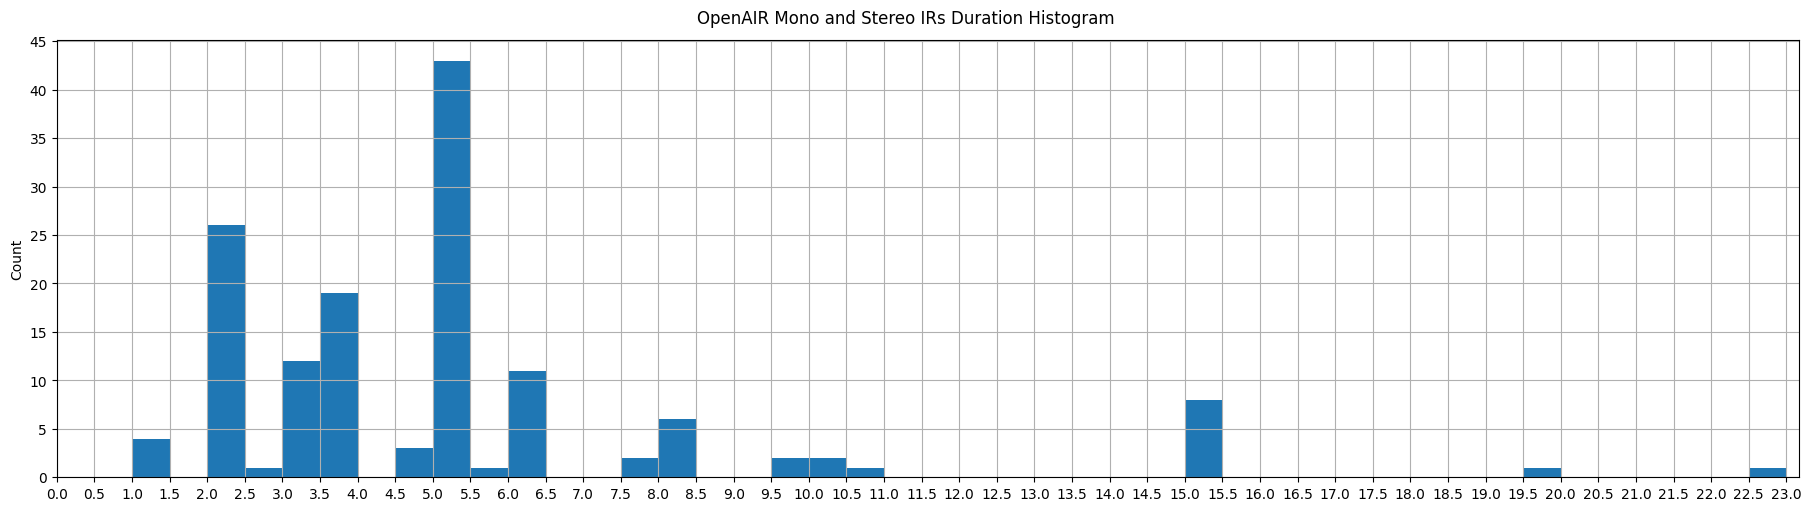

In [ ]:
T = 1.0

openair_8k_ir_durations = []
for ir_path in open_air_8k_paths:
    ir_len = audio_processing.check_wav_file(ir_path, fs=fs)
    openair_8k_ir_durations.append(ir_len/fs)
print(f"There are {len(openair_8k_ir_durations)} IRs")
openair_8k_ir_durations = np.array(openair_8k_ir_durations)
print(f"Min duration: {openair_8k_ir_durations.min():.4f} s")
print(f"Max duration: {openair_8k_ir_durations.max():.4f} s")
print(f"Mean duration: {openair_8k_ir_durations.mean():.4f} s")
print(f"Std duration: {openair_8k_ir_durations.std():.4f} s")
print(f"Median duration: {np.median(openair_8k_ir_durations):.4f} s")
print(f"Total duration: {openair_8k_ir_durations.sum()/60:.4f} m")

open_air_8k_long_ir_durs = [dur for dur in openair_8k_ir_durations if dur > T]
print(f"{len(open_air_8k_long_ir_durs)} files are longer than {T} s")
print(f"Total duration of these files: {sum(open_air_8k_long_ir_durs)/60:.4f} m")

fig, ax = plt.subplots(figsize=(18, 5), constrained_layout=True)
fig.suptitle("OpenAIR Mono and Stereo IRs Duration Histogram")

x_max = max(openair_8k_ir_durations)

ax.hist(openair_8k_ir_durations, bins=np.arange(0, x_max+0.5, 0.5))
# ax.set_title("Train Set")
ax.set_xticks(np.arange(0, x_max+0.5, 0.5))
ax.set_xlim([0,x_max+0.5])
ax.set_ylabel("Count")
ax.set_yticks(np.arange(0, 46, 5))
ax.grid()
plt.show()

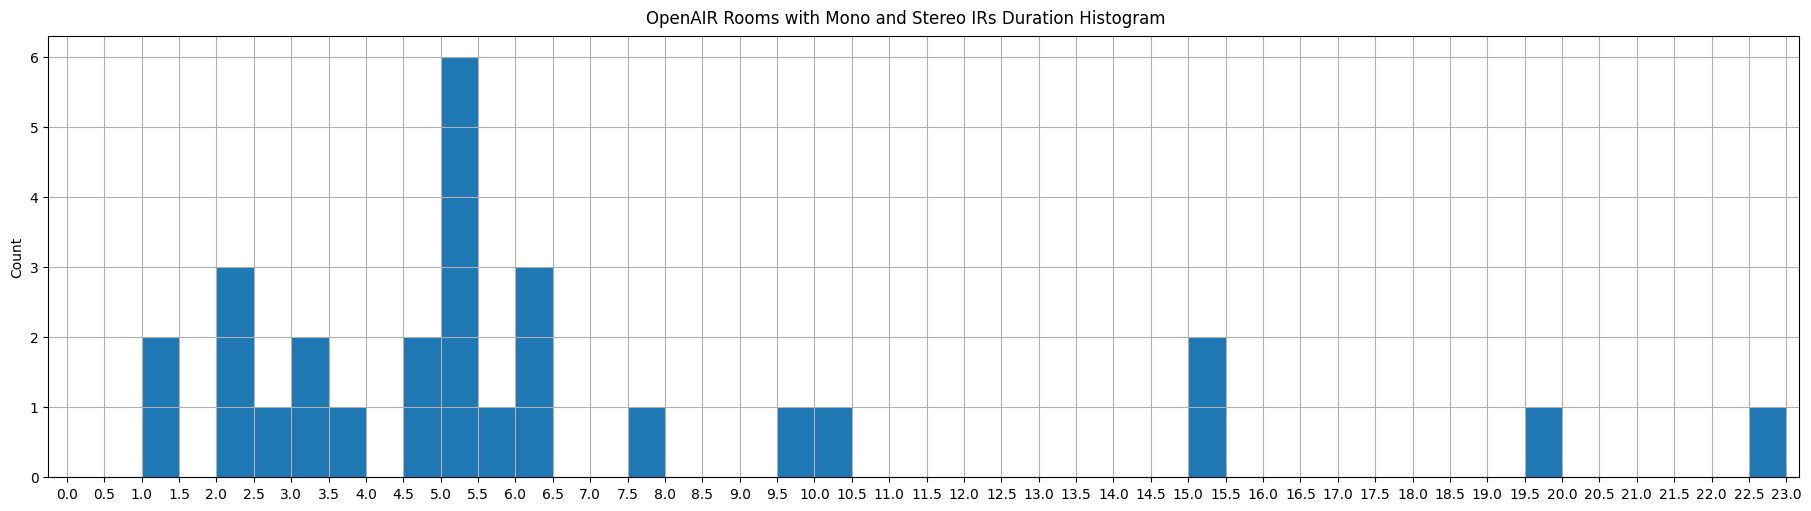

In [ ]:
open_air_8k_room_durations = []
for room in open_air_8k_rooms:
    room_dir = os.path.join(open_air_8k_dir, room)
    room_paths = sorted(glob(os.path.join(room_dir, "**", "*.wav"), recursive=True))
    _durations = []
    for _path in room_paths:
        audio_len = audio_processing.check_wav_file(_path, fs=fs)
        _durations.append(audio_len/fs)
    dur = np.min(_durations)
    open_air_8k_room_durations.append(dur)

fig, ax = plt.subplots(figsize=(18, 5), constrained_layout=True)
fig.suptitle("OpenAIR Rooms with Mono and Stereo IRs Duration Histogram")

x_max = max(open_air_8k_room_durations)
ax.hist(open_air_8k_room_durations, bins=np.arange(0, x_max+0.5, 0.5))
ax.set_xticks(np.arange(0, x_max+0.5, 0.5))
ax.set_xlim([0-0.25,x_max+0.5])
ax.set_ylabel("Count")
ax.grid()
plt.show()

#### Listen to the rooms

In [ ]:
room = open_air_8k_rooms[1]
print(room)
room_ir_paths = sorted(glob(os.path.join(open_air_8k_dir, room, "**/*.wav"), recursive=True))
print(len(room_ir_paths))

falkland-palace-royal-tennis-court
1


In [ ]:
audio_path = nafp_music_db_paths[100]
audio = audio_processing.load_wav(audio_path, fs=fs)
print(audio_path)
ipd.display(ipd.Audio(audio, rate=fs))

In [ ]:
for ir_path in room_ir_paths:

    ir = audio_processing.load_wav(ir_path, fs=fs)
    print(os.path.basename(ir_path))
    print(np.max(np.abs(ir)))
    print(len(ir)/fs)
    ipd.display(ipd.Audio(ir, rate=fs))

    audio_room = audio_processing.convolve_with_IR(audio, ir)
    ipd.display(ipd.Audio(audio_room[:10*fs], rate=fs))

#### Find Mono and Stereo Files

In [19]:
open_air_dir = os.path.join(datasets_dir, "IR", "room", "OPENAIR", "IRs")
open_air_ir_paths = sorted(glob(os.path.join(open_air_dir, "**/*.wav"), recursive=True))
print(len(open_air_ir_paths))

open_air_rooms = sorted([d for d in os.listdir(open_air_dir) if os.path.isdir(os.path.join(open_air_dir, d))])
print(len(open_air_rooms))
# print('\n'.join(open_air_rooms))

open_air_ir_names = sorted([os.path.basename(path) for path in open_air_ir_paths])
# print(len(open_air_ir_names))

604
56


In [ ]:
for root, dirs, files in os.walk(open_air_dir):
    if root == open_air_dir:
        continue
    if dirs:
        print(dirs)

['stereo']
['b-format']
['b-format']
['b-format']
['b-format']
['clifford-tower-IR-Bformat']
['b-format', 'mono']
['b-format']
['stereo']
['b-format']
['b-format', 'mono', 'stereo', 'surround-5-1']
['IR_ScaleModel', 'IR_Streched_ScaleModel']
['b-format']
['b-format', 'mono']
['b-format', 'stereo', 'surround-5-1']
['HH-3order-Ambisonic-16channels', 'HH-Bformat']
['b-format']
['b-format']
['auralizations']
['Auralization Results-20220429T115329Z-001']
['Auralization Results']
['b-format', 'mono']
['b-format']
['b-format', 'mono']
['b-format', 'mono']
['b-format', 'mono', 'stereo', 'surround-5-1']
['B-Format', 'Examples', 'Images', 'Virtual Recreation']
['b-format', 'stereo']
['b-format']
['PL001-3order-Ambisonic-16channels', 'PL001-bformat']
['b-format', 'mono', 'stereo', 'surround-5-1']
['b-format']
['stereo']
['b-format', 'mono']
['mono']
['stereo']
['b-format', 'mono', 'stereo', 'surround-5-1']
['b-format', 'stereo']
['b-format', 'stereo']
['stereo']
['b-format', 'Video']
['b-format',

wheldrake-wood/IR_M30/ is mono 2 sources 2 receivers

In [ ]:
open_air_mono_dirs = []
open_air_no_mono_stereo_dirs = []
for root, dirs, files in os.walk(open_air_dir):

    if root == open_air_dir:
        continue
    if 'mono' in dirs:
        # print(root)
        open_air_mono_dirs.append(os.path.join(root, 'mono'))
    elif 'stereo' in dirs:
        open_air_no_mono_stereo_dirs.append(os.path.join(root, 'stereo'))

    # edge case of mono
    if 'IR_M30' in dirs:
        open_air_mono_dirs.append(os.path.join(root, 'IR_M30'))

print(len(open_air_mono_dirs))
print(len(open_air_no_mono_stereo_dirs))

20
15


In [ ]:
open_air_mono_paths = []
for root in open_air_mono_dirs:
    open_air_mono_paths.extend(glob(os.path.join(root, '**', "*.wav"), recursive=True))
open_air_mono_paths = sorted(open_air_mono_paths)
open_air_mono_names = [os.path.basename(path) for path in open_air_mono_paths]
print(len(open_air_mono_paths))

open_air_no_mono_stereo_paths = []
for root in open_air_no_mono_stereo_dirs:
    open_air_no_mono_stereo_paths.extend(glob(os.path.join(root, '**', "*.wav"), recursive=True))
open_air_no_mono_stereo_paths = sorted(open_air_no_mono_stereo_paths)
open_air_no_mono_stereo_names = [os.path.basename(path) for path in open_air_no_mono_stereo_paths]
print(len(open_air_no_mono_stereo_paths))

86
73


In [ ]:
openair_monos_new_dir = os.path.join(os.path.dirname(os.path.dirname(open_air_dir)), "OPENAIR-mono")
os.makedirs(openair_monos_new_dir, exist_ok=True)

for ir_dir in open_air_mono_dirs:

    # creswell is  empty
    # slinky is irrelevant
    # virtual-membranes irrelevant
    if "creswell-crags" in ir_dir or "slinky-ir" in ir_dir or "virtual-membranes" in ir_dir:
        continue

    structure = os.sep.join(ir_dir.split(os.sep)[-2:])
    new_dir = os.path.join(openair_monos_new_dir, structure)
    print(new_dir)
    os.makedirs(new_dir, exist_ok=True)

    ir_paths = sorted(glob(os.path.join(ir_dir, "*.wav")))
    for path in ir_paths:
        # Duplicate 32khz also exist
        if "r1-nuclear-reactor-hall/mono/r1_omni_48k.wav" in path:
            continue
        # Only keep this real file
        if "waveguide-web-example-audio" in path and "courtyard_recorded_ir.wav" != os.path.basename(path):
            continue
        name = os.path.basename(path)
        new_path = os.path.join(new_dir, name)
        # shutil.copy(path, new_path)

../../datasets/IR/room/OPENAIR-mono/falkland-palace-royal-tennis-court/mono
../../datasets/IR/room/OPENAIR-mono/gill-heads-mine/mono
../../datasets/IR/room/OPENAIR-mono/innocent-railway-tunnel/mono
../../datasets/IR/room/OPENAIR-mono/koli-national-park-summer/mono
../../datasets/IR/room/OPENAIR-mono/koli-national-park-winter/mono
../../datasets/IR/room/OPENAIR-mono/lady-chapel-st-albans-cathedral/mono
../../datasets/IR/room/OPENAIR-mono/r1-nuclear-reactor-hall/mono
../../datasets/IR/room/OPENAIR-mono/shrine-and-parish-church-all-saints-north-street-_/mono
../../datasets/IR/room/OPENAIR-mono/sports-centre-university-york/mono
../../datasets/IR/room/OPENAIR-mono/st-matthews-church-walsall/mono
../../datasets/IR/room/OPENAIR-mono/terrys-factory-warehouse/mono
../../datasets/IR/room/OPENAIR-mono/terrys-typing-room/mono
../../datasets/IR/room/OPENAIR-mono/trollers-gill/mono
../../datasets/IR/room/OPENAIR-mono/tyndall-bruce-monument/mono
../../datasets/IR/room/OPENAIR-mono/usina-del-arte-sym

In [ ]:
openair_stereos_new_dir = os.path.join(os.path.dirname(os.path.dirname(open_air_dir)), "OPENAIR-stereo")
os.makedirs(openair_stereos_new_dir, exist_ok=True)

for ir_dir in open_air_no_mono_stereo_dirs:

    if "tvisongur-sound-sculpture-iceland-model" in ir_dir:
        continue

    structure = os.sep.join(ir_dir.split(os.sep)[-2:])
    new_dir = os.path.join(openair_stereos_new_dir, structure)
    print(new_dir)
    os.makedirs(new_dir, exist_ok=True)

    ir_paths = sorted(glob(os.path.join(ir_dir, "*.wav")))
    for path in ir_paths:
        name = os.path.basename(path)
        new_path = os.path.join(new_dir, name)
        # print(new_path)
        # shutil.copy(path, new_path)

../../datasets/IR/room/OPENAIR-stereo/1st-baptist-nashville/stereo
../../datasets/IR/room/OPENAIR-stereo/elveden-hall-suffolk-england/stereo
../../datasets/IR/room/OPENAIR-stereo/hamilton-mausoleum/stereo
../../datasets/IR/room/OPENAIR-stereo/maes-howe/stereo
../../datasets/IR/room/OPENAIR-stereo/saint-lawrence-church-molenbeek-wersbeek-belgium/stereo
../../datasets/IR/room/OPENAIR-stereo/spokane-womans-club/stereo
../../datasets/IR/room/OPENAIR-stereo/spring-lane-building-university-york/stereo
../../datasets/IR/room/OPENAIR-stereo/st-andrews-church/stereo
../../datasets/IR/room/OPENAIR-stereo/st-georges-episcopal-church/stereo
../../datasets/IR/room/OPENAIR-stereo/st-margarets-church-ncem-5-piece-band-spatial-measurements/stereo
../../datasets/IR/room/OPENAIR-stereo/st-marys-abbey-reconstruction/stereo
../../datasets/IR/room/OPENAIR-stereo/st-patricks-church-patrington/stereo
../../datasets/IR/room/OPENAIR-stereo/stairway-university-york/stereo
../../datasets/IR/room/OPENAIR-stereo/y

### Aachen IR

In [20]:
aachen_ir_dir = os.path.join(datasets_dir, "IR", "room", "AIR_1_4")
aachen_ir_paths = sorted(glob(os.path.join(aachen_ir_dir, "**/*.wav"), recursive=True))
print(len(aachen_ir_paths))

aachen_ir_names = sorted([os.path.basename(path) for path in aachen_ir_paths])

224


In [21]:
aachen_bin_ir_dir = os.path.join(datasets_dir, "IR", "room", "AIR_1_4-Binaural_no_dummy_head-from_mat-8khz_16bit")

aachen_bin_ir_paths = sorted(glob(os.path.join(aachen_bin_ir_dir, "**/*.wav"), recursive=True))
print(len(aachen_bin_ir_paths))

aachen_bin_ir_rooms = sorted([d for d in os.listdir(aachen_bin_ir_dir) if os.path.isdir(os.path.join(aachen_bin_ir_dir, d))])
print(len(aachen_bin_ir_rooms))
for room in aachen_bin_ir_rooms:
    room_ir_paths = sorted(glob(os.path.join(aachen_bin_ir_dir, room, "**/*.wav"), recursive=True))
    print(room, len(room_ir_paths))

aachen_bin_ir_names = sorted([os.path.basename(path) for path in aachen_bin_ir_paths])

60
6
aula_carolina 11
booth 6
lecture 12
meeting 10
office 6
stairway 15


#### Analyze IR durations

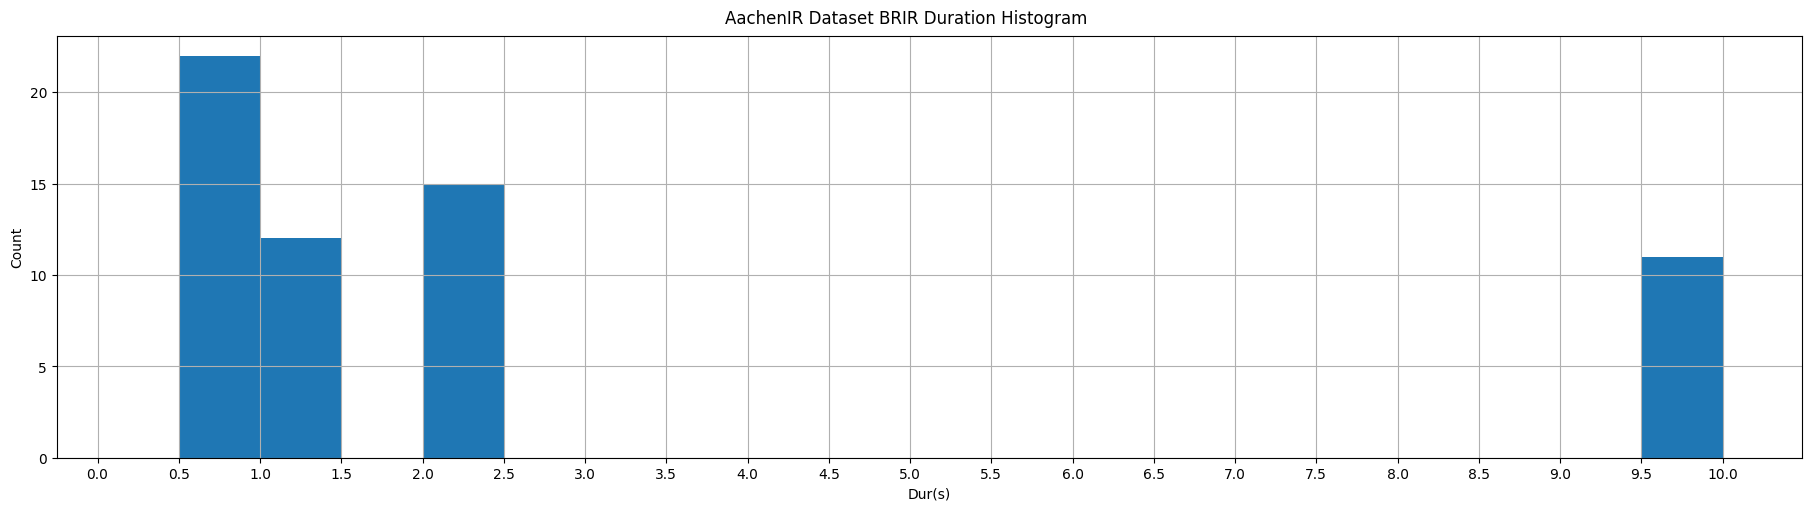

In [7]:
aachen_bin_ir_durations = []
for ir_path in aachen_bin_ir_paths:
    dur = audio_processing.check_wav_file(ir_path, fs=fs) / fs
    aachen_bin_ir_durations.append(dur)

fig, ax = plt.subplots(figsize=(18, 5), constrained_layout=True)
fig.suptitle("AachenIR Dataset BRIR Duration Histogram")

x_max = max(aachen_bin_ir_durations)
ax.hist(aachen_bin_ir_durations, bins=np.arange(0, x_max+0.5, 0.5))
ax.set_xticks(np.arange(0, x_max+0.5, 0.5))
ax.set_xlim([0-0.25,x_max+0.5])
ax.set_ylabel("Count")
ax.set_xlabel("Dur(s)")
ax.grid()
plt.show()

In [8]:
aachen_bin_ir_room_durations = []
for room in aachen_bin_ir_rooms:
    room_ir_paths = sorted(glob(os.path.join(aachen_bin_ir_dir, room, "**/*.wav"), recursive=True))
    _durations = []
    for ir_path in room_ir_paths:
        audio_len = audio_processing.check_wav_file(ir_path, fs=fs)
        _durations.append(audio_len/fs)
    print(room)
    print(np.min(_durations))
    print(np.max(_durations))
    print(np.median(_durations))
    print(np.mean(_durations))
    print()


aula_carolina
9.987
9.987
9.987
9.986999999999998

booth
0.682625
0.682625
0.682625
0.6826249999999999

lecture
1.365375
1.365375
1.365375
1.365375

meeting
0.682625
0.682625
0.682625
0.682625

office
0.682625
0.682625
0.682625
0.6826249999999999

stairway
2.0
2.0
2.0
2.0



#### Listen to the rooms

In [ ]:
room = aachen_bin_ir_rooms[5]
print(room)
room_ir_paths = sorted(glob(os.path.join(aachen_bin_ir_dir, room, "**/*.wav"), recursive=True))

stairway


In [ ]:
audio_path = nafp_music_db_paths[100]
audio = audio_processing.load_wav(audio_path, fs=fs)
print(audio_path)
ipd.display(ipd.Audio(audio, rate=fs))

In [ ]:
for ir_path in room_ir_paths:

    ir = audio_processing.load_wav(ir_path, fs=fs)
    print(os.path.basename(ir_path))
    ipd.display(ipd.Audio(ir, rate=fs))

    audio_room = audio_processing.convolve_with_IR(audio, ir)
    ipd.display(ipd.Audio(audio_room[:5*fs], rate=fs))

### MIT

In [22]:
mit_ir_dir = os.path.join(datasets_dir, "IR", "room", "MIT_Survey-8khz_16bit")
mit_ir_paths = sorted(glob(os.path.join(mit_ir_dir, "**/*.wav"), recursive=True))
print(len(mit_ir_paths))

270


#### Analyze IR durations

There are 270 IRs
Min duration: 0.0948 s
Max duration: 1.9991 s
Mean duration: 0.6445 s
Std duration: 0.4690 s
Median duration: 0.5611 s
Total duration: 2.9004 m
46 files are longer than 1.0 s
Total duration of these files: 1.1394 m


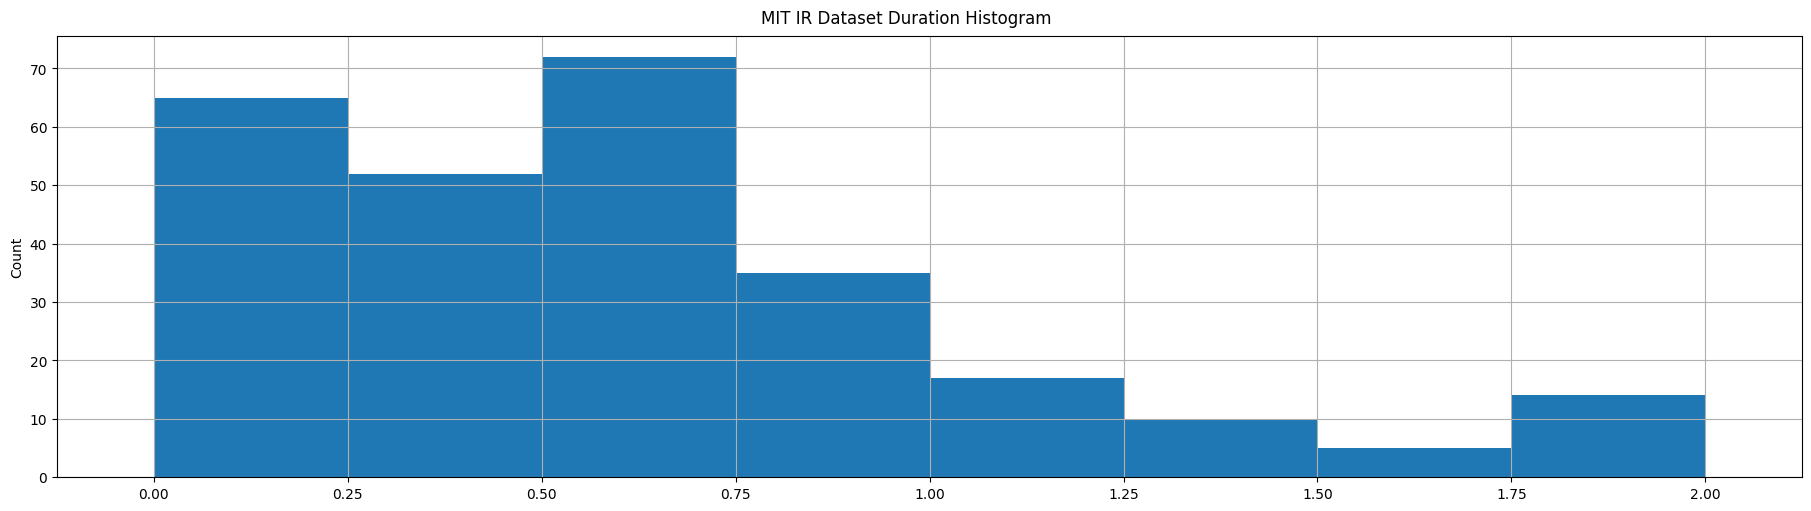

In [10]:
T = 1.0

mit_ir_durations = []
for ir_path in mit_ir_paths:
    ir_len = audio_processing.check_wav_file(ir_path, fs=fs)
    mit_ir_durations.append(ir_len/fs)
# print("Train")
print(f"There are {len(mit_ir_durations)} IRs")
mit_ir_durations = np.array(mit_ir_durations)
print(f"Min duration: {mit_ir_durations.min():.4f} s")
print(f"Max duration: {mit_ir_durations.max():.4f} s")
print(f"Mean duration: {mit_ir_durations.mean():.4f} s")
print(f"Std duration: {mit_ir_durations.std():.4f} s")
print(f"Median duration: {np.median(mit_ir_durations):.4f} s")
print(f"Total duration: {mit_ir_durations.sum()/60:.4f} m")

mit_long_ir_durs = [dur for dur in mit_ir_durations if dur > T]
print(f"{len(mit_long_ir_durs)} files are longer than {T} s")
print(f"Total duration of these files: {sum(mit_long_ir_durs)/60:.4f} m")

fig, ax = plt.subplots(figsize=(18, 5), constrained_layout=True)
fig.suptitle("MIT IR Dataset Duration Histogram")

x_max = max(mit_ir_durations)
delta_t = 0.25

ax.hist(mit_ir_durations, bins=np.arange(0, x_max+delta_t, delta_t))
# ax.set_title("Train Set")
ax.set_xticks(np.arange(0, x_max+delta_t, delta_t))
ax.set_xlim([0-(delta_t/2),x_max+(delta_t/2)])
ax.set_ylabel("Count")
ax.grid()
plt.show()

#### Listen to the rooms

In [ ]:
audio_path = nafp_music_db_paths[100]
audio = audio_processing.load_wav(audio_path, fs=fs)
print(audio_path)
ipd.display(ipd.Audio(audio, rate=fs))

In [ ]:
for i,ir_path in enumerate(mit_ir_paths):
    ir_dur = audio_processing.check_wav_file(ir_path, fs=fs) / fs
    if ir_dur > 1.5:
        print(i,ir_dur,os.path.basename(ir_path))

25 1.776375 h026_Gym_8txts.wav
35 1.982 h036_Bathroom_5txts.wav
40 1.999125 h041_TrainStation_SouthStationBoston_4txts.wav
41 1.9935 h042_Hallway_ElementarySchool_4txts.wav
42 1.98225 h043_Train_BostonTRedLine_4txts.wav
48 1.99225 h049_MallFoodCourt_BurlingtonMall_3txts.wav
59 1.566125 h060_Office_ConferenceRoom_3txts.wav
80 1.987125 h081_Shower_2txts.wav
93 1.57425 h094_Campground_CabinLivingroom_2txts.wav
127 1.992375 h128_Supermarket_1txts.wav
132 1.98125 h133_SubwayStation_ParkStreetBoston_1txts.wav
138 1.994875 h139_OutsideStreetsOfBoston_1txts.wav
177 1.6505 h178_OfficeFoyer_1txts.wav
210 1.993 h211_Stairwell_1txts.wav
212 1.868625 h213_SubwayStation_CentralSquareCambridge_1txts.wav
231 1.659875 h232_Hallway_MITCampus_1txts.wav
249 1.87225 h251_Hallway_MITCampus_1txts.wav
253 1.52475 h255_MITCampus_StudentLounge_1txts.wav
254 1.993375 h256_Stairwell_1txts.wav


In [ ]:
ir_path = mit_ir_paths[41]

ir = audio_processing.load_wav(ir_path, fs=fs)

print('IR')
print(os.path.basename(ir_path))
print(len(ir)/fs)
ipd.display(ipd.Audio(ir, rate=fs))

print('Music')
ipd.display(ipd.Audio(audio[:10*fs], rate=fs))

print('Music in Room')
audio_room = audio_processing.convolve_with_IR(audio, ir)
ipd.display(ipd.Audio(audio_room[:10*fs], rate=fs))

### NAFP

In [23]:
nafp_ir_dir = os.path.join(nafp_dataset_dir, "aug/ir")

nafp_ir_tr_dir = os.path.join(nafp_ir_dir, "tr")
nafp_ir_tr_paths = glob(os.path.join(nafp_ir_tr_dir, "*.wav"))
print(f"{len(nafp_ir_tr_paths)} IR Training files")

nafp_ir_ts_dir = os.path.join(nafp_ir_dir, "ts")
nafp_ir_ts_paths = glob(os.path.join(nafp_ir_ts_dir, "*.wav"))
print(f"{len(nafp_ir_ts_paths)} IR Testing files")

345 IR Training files
95 IR Testing files


#### Analyze IR durations

Train
There are 345 IRs
Min duration: 0.0015 s
Max duration: 20.2800 s
Mean duration: 2.0386 s
Std duration: 1.7806 s
Median duration: 1.7386 s
Total duration: 11.7220 m
266 files are longer than 1.0 s
Total duration of these files: 11.2952 m

Test
There are 95 IRs
Min duration: 0.0019 s
Max duration: 23.0108 s
Mean duration: 2.1089 s
Std duration: 3.2728 s
Median duration: 1.2985 s
Total duration: 3.3390 m
60 files are longer than 1.0 s
Total duration of these files: 3.1111 m


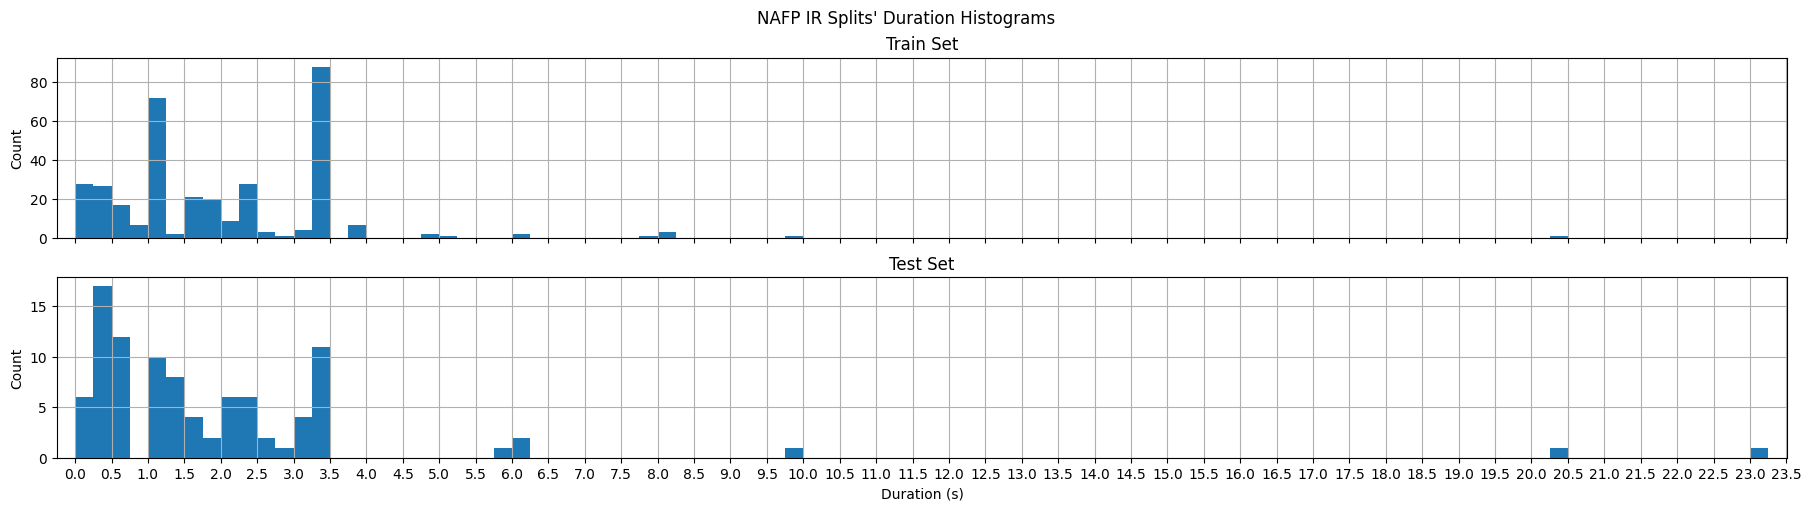

In [ ]:
T = 1.0

nafp_ir_tr_durations = []
for ir_path in nafp_ir_tr_paths:
    ir = audio_processing.load_wav(ir_path, fs=fs)
    nafp_ir_tr_durations.append(len(ir)/fs)
print("Train")
print(f"There are {len(nafp_ir_tr_durations)} IRs")
nafp_ir_tr_durations = np.array(nafp_ir_tr_durations)
print(f"Min duration: {nafp_ir_tr_durations.min():.4f} s")
print(f"Max duration: {nafp_ir_tr_durations.max():.4f} s")
print(f"Mean duration: {nafp_ir_tr_durations.mean():.4f} s")
print(f"Std duration: {nafp_ir_tr_durations.std():.4f} s")
print(f"Median duration: {np.median(nafp_ir_tr_durations):.4f} s")
print(f"Total duration: {nafp_ir_tr_durations.sum()/60:.4f} m")

long_ir_tr_durs = [dur for dur in nafp_ir_tr_durations if dur > T]
print(f"{len(long_ir_tr_durs)} files are longer than {T} s")
print(f"Total duration of these files: {sum(long_ir_tr_durs)/60:.4f} m")

nafp_ir_ts_durations = []
for ir_path in nafp_ir_ts_paths:
    ir = audio_processing.load_wav(ir_path, fs=fs)
    nafp_ir_ts_durations.append(len(ir)/fs)
print("\nTest")
print(f"There are {len(nafp_ir_ts_durations)} IRs")
nafp_ir_ts_durations = np.array(nafp_ir_ts_durations)
print(f"Min duration: {nafp_ir_ts_durations.min():.4f} s")
print(f"Max duration: {nafp_ir_ts_durations.max():.4f} s")
print(f"Mean duration: {nafp_ir_ts_durations.mean():.4f} s")
print(f"Std duration: {nafp_ir_ts_durations.std():.4f} s")
print(f"Median duration: {np.median(nafp_ir_ts_durations):.4f} s")
print(f"Total duration: {nafp_ir_ts_durations.sum()/60:.4f} m")

nafp_long_ir_ts_durs = [dur for dur in nafp_ir_ts_durations if dur > T]
print(f"{len(nafp_long_ir_ts_durs)} files are longer than {T} s")
print(f"Total duration of these files: {sum(nafp_long_ir_ts_durs)/60:.4f} m")

fig, ax = plt.subplots(nrows=2, figsize=(18, 5), constrained_layout=True, sharex=True)
fig.suptitle("NAFP IR Splits' Duration Histograms")

x_max = max(max(nafp_ir_tr_durations), max(nafp_ir_ts_durations))

ax[0].hist(nafp_ir_tr_durations, bins=np.arange(0, x_max+0.5, 0.25))
ax[0].set_title("Train Set")

ax[1].hist(nafp_ir_ts_durations, bins=np.arange(0, x_max+0.5, 0.25))
ax[1].set_title("Test Set")
ax[1].set_xlabel("Duration (s)")

for _x in ax:
    _x.set_xticks(np.arange(0, x_max+0.5, 0.5))
    _x.set_xlim([0-0.25,x_max+0.5])
    _x.set_ylabel("Count")
    _x.grid()
plt.show()

#### Listen to the rooms

In [ ]:
for i,ir_dur in enumerate(nafp_ir_ts_durations):
    if ir_dur > 10.0:
        print(i,ir_dur,nafp_ir_ts_paths[i])

39 23.01075 ../../datasets/neural-audio-fp-dataset/aug/ir/ts/terrys_warehouse_stereo.wav
67 20.28 ../../datasets/neural-audio-fp-dataset/aug/ir/ts/r1_ortf-48k.wav


In [ ]:
ipd.display(ipd.Audio(nafp_ir_ts_paths[0], rate=fs))

#### NAFP IR File Type Analysis

In [24]:
nafp_ir_paths = sorted(glob(os.path.join(nafp_ir_dir, "**", "*.wav"), recursive=True))
print(len(nafp_ir_paths))

440


In [25]:
# __ signifies that a RIR is convolved with a MIR
nafp_ir_paths_filtered = sorted([path for path in nafp_ir_paths if "__" not in path])
print(len(nafp_ir_paths_filtered))

nafp_ir_names_filtered = sorted([os.path.basename(path) for path in nafp_ir_paths_filtered])
nafp_ir_names_filtered

197


['18a_smoking_room.wav',
 '1_c414_r.wav',
 '1_nt1_l.wav',
 '1a_marble_hall.wav',
 '3_c414_l.wav',
 '3_nt1_l.wav',
 '3_nt1_r.wav',
 '3a_hats_cloaks_the_lord.wav',
 '4_c414_r.wav',
 '4a_hats_cloaks_visitors.wav',
 '5_c414_r.wav',
 '5_nt1_r.wav',
 'Altec_639.wav',
 'Altec_670A.wav',
 'Altec_670B.wav',
 'American_R331.wav',
 'Amperite_RA.wav',
 'BBCmarconi_B.wav',
 'BeO_BM2.wav',
 'BeO_BM6.wav',
 'Beomic_1000.wav',
 'Beyer_M260.wav',
 'Beyer_M360.wav',
 'BnO_H9i.wav',
 'Coles_4038.wav',
 'Cozy_usbmic.wav',
 'Doremi_351.wav',
 'EMI_ribbon.wav',
 'EV_RE20_Flat.wav',
 'EV_RE20_HPF.wav',
 'Fairpods2.wav',
 'FilmIndustries_M8.wav',
 'GEC_2373_Ribbon.wav',
 'GEC_bigdynamic.wav',
 'GNote2.wav',
 'Grampian_GR2.wav',
 'IR_AKGD12.wav',
 'IR_AKG_FaultyD12.wav',
 'IR_Astatic77.wav',
 'IR_BeyerM500Stock.wav',
 'IR_FosterDynamicDF1.wav',
 'IR_Framez.wav',
 'IR_GaumontKalee.wav',
 'IR_Lomo52A5M.wav',
 'IR_Meazzi.wav',
 'IR_MelodiumRM6.wav',
 'IR_OktavaMK18Silver.wav',
 'IR_OktavaMK18_Overload.wav',
 'IR_

In [27]:
nafp_aachen_names = sorted(list(set(nafp_ir_names_filtered).intersection(set(aachen_ir_names))))
print(len(nafp_aachen_names))

nafp_open_air_names = sorted(list(set(nafp_ir_names_filtered).intersection(set(open_air_ir_names))))
print(len(nafp_open_air_names))

0
59


In [29]:
nafp_air_ir_names = [
    'air_binaural_aula_carolina_1_1_1_90_3.wav',
    'air_binaural_booth_0_1_1.wav',
    'air_binaural_lecture_1_0_2.wav',
    'air_binaural_meeting_1_0_5.wav',
    'air_binaural_office_1_1_3.wav',
    'air_binaural_stairway_0_1_2_45.wav',
    'air_binaural_stairway_1_1_1_60.wav',
    'air_binaural_stairway_1_1_3_30.wav',
    'air_phone_corridor_hfrp_1.wav',
    'air_phone_meeting_hfrp_1.wav',
    'air_phone_stairway2_hhp_1.wav',
]
print(len(nafp_air_ir_names))

11


In [30]:
sorted(list(set(nafp_ir_names_filtered).difference(nafp_open_air_names).difference(nafp_air_ir_names)))

['Altec_639.wav',
 'Altec_670A.wav',
 'Altec_670B.wav',
 'American_R331.wav',
 'Amperite_RA.wav',
 'BBCmarconi_B.wav',
 'BeO_BM2.wav',
 'BeO_BM6.wav',
 'Beomic_1000.wav',
 'Beyer_M260.wav',
 'Beyer_M360.wav',
 'BnO_H9i.wav',
 'Coles_4038.wav',
 'Cozy_usbmic.wav',
 'Doremi_351.wav',
 'EMI_ribbon.wav',
 'EV_RE20_Flat.wav',
 'EV_RE20_HPF.wav',
 'Fairpods2.wav',
 'FilmIndustries_M8.wav',
 'GEC_2373_Ribbon.wav',
 'GEC_bigdynamic.wav',
 'GNote2.wav',
 'Grampian_GR2.wav',
 'IR_AKGD12.wav',
 'IR_AKG_FaultyD12.wav',
 'IR_Astatic77.wav',
 'IR_BeyerM500Stock.wav',
 'IR_FosterDynamicDF1.wav',
 'IR_Framez.wav',
 'IR_GaumontKalee.wav',
 'IR_Lomo52A5M.wav',
 'IR_Meazzi.wav',
 'IR_MelodiumRM6.wav',
 'IR_OktavaMK18Silver.wav',
 'IR_OktavaMK18_Overload.wav',
 'IR_OktavaML16.wav',
 'IR_RCAKU3a.wav',
 'IR_ResloCR600.wav',
 'IR_ResloDynamic.wav',
 'IR_ResloURA.wav',
 'IR_STC4033_Cardioid.wav',
 'IR_STC4033_Pressure.wav',
 'IR_STC4033_Ribbon.wav',
 'IR_Shure510C.wav',
 'Melodium_42B_1.wav',
 'Melodium_Model

In [69]:
vintage_microphone_names = [
    'Altec_639.wav',
    'Altec_670A.wav',
    'Altec_670B.wav',
    'American_R331.wav',
    'Amperite_RA.wav',
    'BBCmarconi_B.wav',
    'BeO_BM2.wav',
    'BeO_BM6.wav',
    'Beomic_1000.wav',
    'Beyer_M260.wav',
    'Beyer_M360.wav',
    'Coles_4038.wav',
    'Doremi_351.wav',
    'EMI_ribbon.wav',
    'EV_RE20_Flat.wav',
    'EV_RE20_HPF.wav',
    'FilmIndustries_M8.wav',
    'GEC_2373_Ribbon.wav',
    'GEC_bigdynamic.wav',
    'Grampian_GR2.wav',
    'IR_AKGD12.wav',
    'IR_AKG_FaultyD12.wav',
    'IR_Astatic77.wav',
    'IR_BeyerM500Stock.wav',
    'IR_FosterDynamicDF1.wav',
    'IR_Framez.wav',
    'IR_GaumontKalee.wav',
    'IR_Lomo52A5M.wav',
    'IR_Meazzi.wav',
    'IR_MelodiumRM6.wav',
    'IR_OktavaMK18Silver.wav',
    'IR_OktavaMK18_Overload.wav',
    'IR_OktavaML16.wav',
    'IR_RCAKU3a.wav',
    'IR_ResloCR600.wav',
    'IR_ResloDynamic.wav',
    'IR_ResloURA.wav',
    'IR_STC4033_Cardioid.wav',
    'IR_STC4033_Pressure.wav',
    'IR_STC4033_Ribbon.wav',
    'IR_Shure510C.wav',
    'Melodium_42B_1.wav',
    'Melodium_Model12.wav',
    'Oktava_ML19.wav',
    'RCA_44BX_1.wav',
    'RCA_44BX_2.wav',
    'RCA_74B.wav',
    'RCA_77DX_1.wav',
    'RCA_77DX_2.wav',
    'RCA_KU3a_1.wav',
    'RCA_PB90.wav',
    'RCA_varacoustic_fig8.wav',
    'Reslo_RB250.wav',
    'Reslo_RB_RedLabel.wav',
    'Reslo_RV.wav',
    'Reslo_SR1.wav',
    'Reslo_VMC2.wav',
    'Shure315_HPF.wav',
    'Shure315_flat.wav',
    'Sony_C37Fet.wav',
    'Telefunken_M201.wav',
    'Toshiba_TypeG.wav',
    'Toshiba_TypeH_BK5.wav',
    'Toshiba_TypeK_HPF.wav',
    'Toshiba_TypeK_flat.wav',
]
print(len(vintage_microphone_names))

nafp_vintage_mic_ir_paths = [ir_path for ir_path in nafp_ir_paths_filtered if os.path.basename(ir_path) in vintage_microphone_names]
print(len(nafp_vintage_mic_ir_paths))

65
65


In [98]:
nafp_other_microphone_names = [
    'Cozy_usbmic.wav', # usb Mic computer
    'Pillar_usbmic.wav',
    'Zony pcm-a10.wav', # Sony PCM-A10 good quality microphone
]

In [110]:
nafp_phone_microphone_names = [
    'GNote2.wav',
    'xiaomi_mi_airdots2.wav',
    'xiaomimia1.wav',
    'iphoneX.wav',
    'jphone6.wav',
    'jphoneXS.wav',
    'gamsungS3.wav',
    'S3.wav',
    'S7.wav',
    'S8.wav',
    'Samsungbundle.wav',
    'Xiaomipiston.wav',
    'Zamsungbundle.wav',
    'Mote2.wav', # not sure if Note2 phone
    'axiaomimia1.wav',
    'pixel3.wav',
]
print(len(nafp_phone_microphone_names))

# iphoneX.wav is both in tr and ts!!!!
nafp_phone_mic_paths = [ir_path for ir_path in nafp_ir_paths_filtered if os.path.basename(ir_path) in nafp_phone_microphone_names]
print(len(nafp_phone_mic_paths))

16
17


In [102]:
nafp_headphone_names = [
    'BnO_H9i.wav', # headphone
    'Fairpods2.wav', # I guess apple airpods
    'fakeairpod.wav',
    'hairpodpro.wav',
    'hairpods1.wav',
    'hearpod.wav',
    'sennheisermm550x.wav', # headphone
    'sonicast_dirak_mk2.wav', # Sonicast Dirac+ MK2 headphone
]
print(len(nafp_headphone_names))

nafp_headphone_ir_paths = [ir_path for ir_path in nafp_ir_paths_filtered if os.path.basename(ir_path) in nafp_headphone_names]
print(len(nafp_headphone_ir_paths))

8
8


In [101]:
nafp_unkown_ir_names = sorted(list(set(nafp_ir_names_filtered).difference(nafp_open_air_names).difference(nafp_air_ir_names).difference(vintage_microphone_names).difference(nafp_other_microphone_names).difference(nafp_phone_microphone_names).difference(nafp_headphone_names)))
print(len(nafp_unkown_ir_names))
nafp_unkown_ir_names

27


['QS7.wav',
 'RS3.wav',
 'RS7.wav',
 'RS8.wav',
 'concerthall_1mleft_fl.wav',
 'concerthall_2mleft_sr.wav',
 'concerthall_8mright_sr.wav',
 'concertspeech2mright_sl.wav',
 'conecerthall_4mright_fl.wav',
 'conecrtspeech8mleft_fr.wav',
 'eduleft_sl.wav',
 'eduright_fr.wav',
 'eduright_sl.wav',
 'left_fl.wav',
 'left_fr.wav',
 'left_sl.wav',
 'left_sr.wav',
 'music2mright_sl.wav',
 'music_2mleft_sl.wav',
 'pobmarley.wav',
 'right_fl.wav',
 'right_fr.wav',
 'right_sl.wav',
 'right_sr.wav',
 'speech_1mleft_fr.wav',
 'speech_2mleft_fr.wav',
 'vegabundle.wav']

### NMFP

In [12]:
nafp_pp_room_ir_dir = os.path.join(nafp_pp_dataset_dir, "aug", "room_ir")

nafp_pp_tr_room_ir_paths = sorted(glob(os.path.join(nafp_pp_room_ir_dir, "dev", "**", "*.wav"), recursive=True))
print(len(nafp_pp_tr_room_ir_paths))

nafp_pp_ts_room_ir_paths = sorted(glob(os.path.join(nafp_pp_room_ir_dir, "test", "**", "*.wav"), recursive=True))
print(len(nafp_pp_ts_room_ir_paths))

364
109


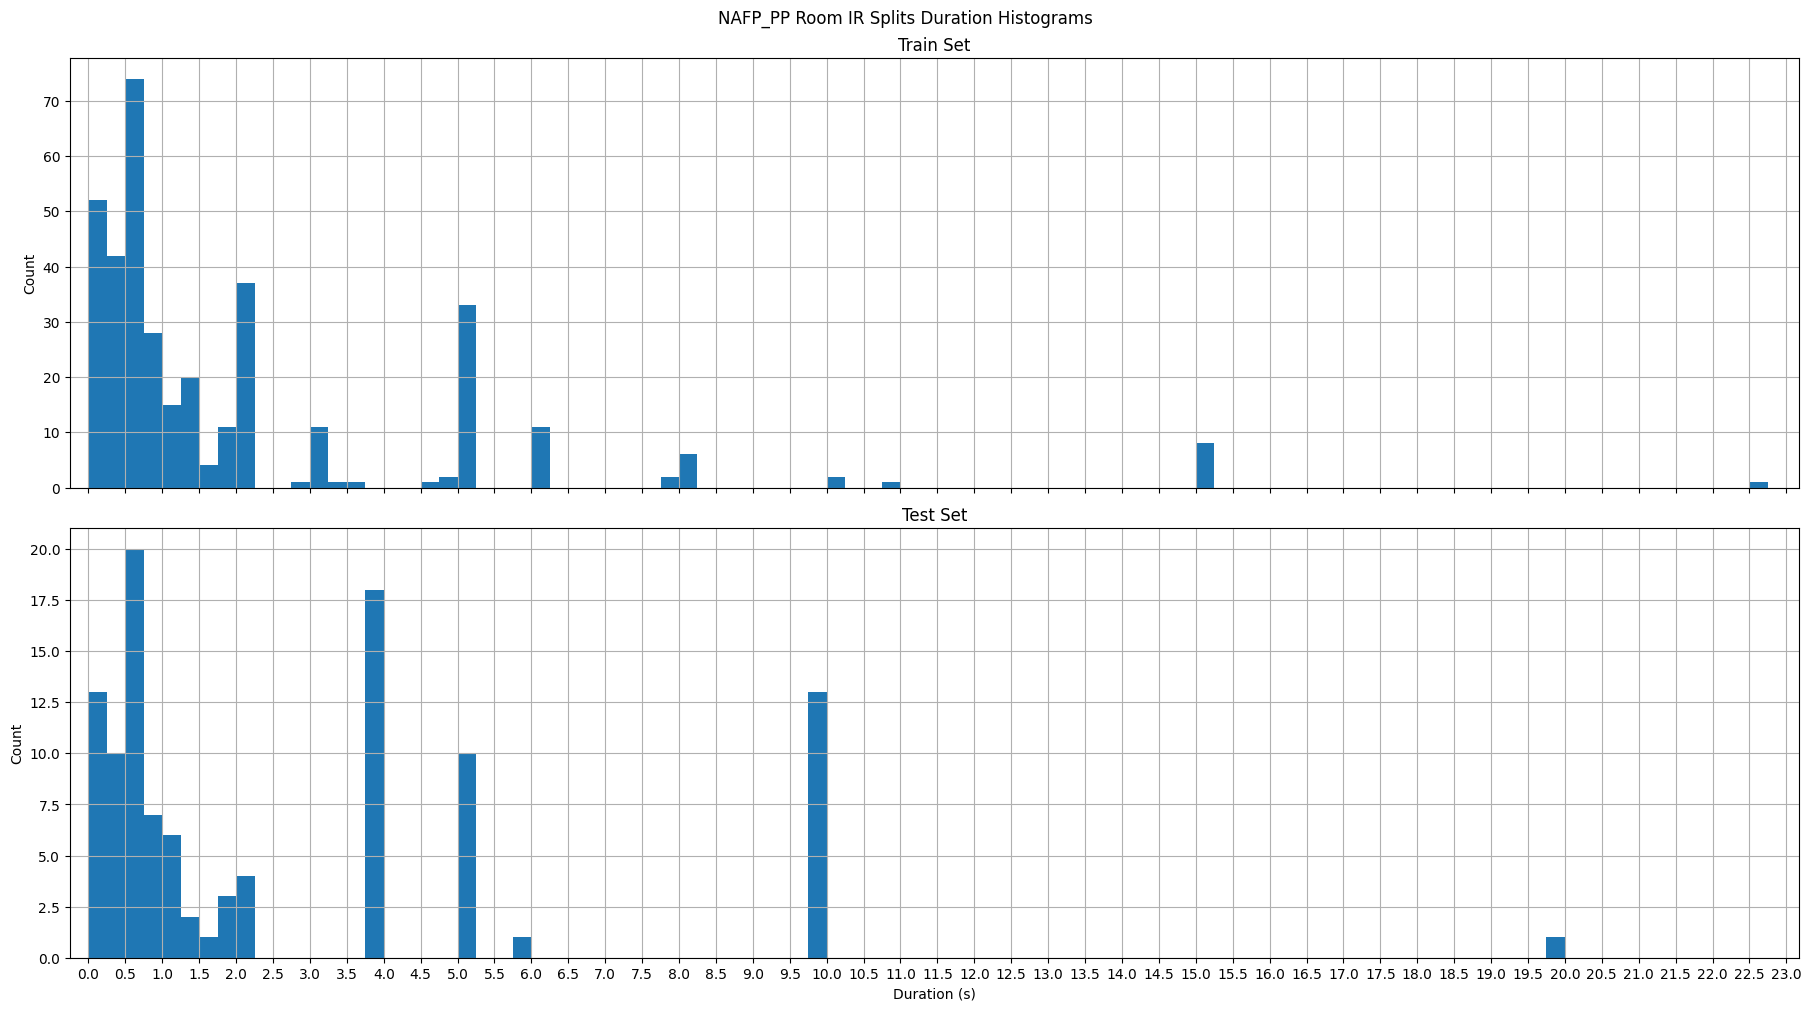

In [14]:
nafp_pp_tr_room_ir_durations = []
for ir_path in nafp_pp_tr_room_ir_paths:
    ir = audio_processing.load_wav(ir_path, fs=fs)
    nafp_pp_tr_room_ir_durations.append(len(ir)/fs)
nafp_pp_tr_room_ir_durations = np.array(nafp_pp_tr_room_ir_durations)

nafp_pp_ts_room_ir_durations = []
for ir_path in nafp_pp_ts_room_ir_paths:
    ir = audio_processing.load_wav(ir_path, fs=fs)
    nafp_pp_ts_room_ir_durations.append(len(ir)/fs)
nafp_pp_ts_room_ir_durations = np.array(nafp_pp_ts_room_ir_durations)

fig, ax = plt.subplots(nrows=2, figsize=(18, 10), constrained_layout=True, sharex=True)
fig.suptitle("NAFP_PP Room IR Splits Duration Histograms")

x_max = max(max(nafp_pp_tr_room_ir_durations), max(nafp_pp_ts_room_ir_durations))

ax[0].hist(nafp_pp_tr_room_ir_durations, bins=np.arange(0, x_max+0.5, 0.25))
ax[0].set_title("Train Set")

ax[1].hist(nafp_pp_ts_room_ir_durations, bins=np.arange(0, x_max+0.5, 0.25))
ax[1].set_title("Test Set")
ax[1].set_xlabel("Duration (s)")

for _x in ax:
    _x.set_xticks(np.arange(0, x_max+0.5, 0.5))
    _x.set_xlim([0-0.25,x_max+0.5])
    _x.set_ylabel("Count")
    _x.grid()
plt.show()

In [16]:
for dataset_name in ["MIT", 'OPENAIR', 'AachenIR']:
    for split_name in ["dev", "test"]:
        split_dir = os.path.join(nafp_pp_room_ir_dir, split_name, dataset_name)
        split_paths = sorted(glob(os.path.join(split_dir, "**", "*.wav"), recursive=True))
        print(f"{dataset_name} {split_name} {len(split_paths)}")

MIT dev 216
MIT test 54
OPENAIR dev 105
OPENAIR test 38
AachenIR dev 43
AachenIR test 17


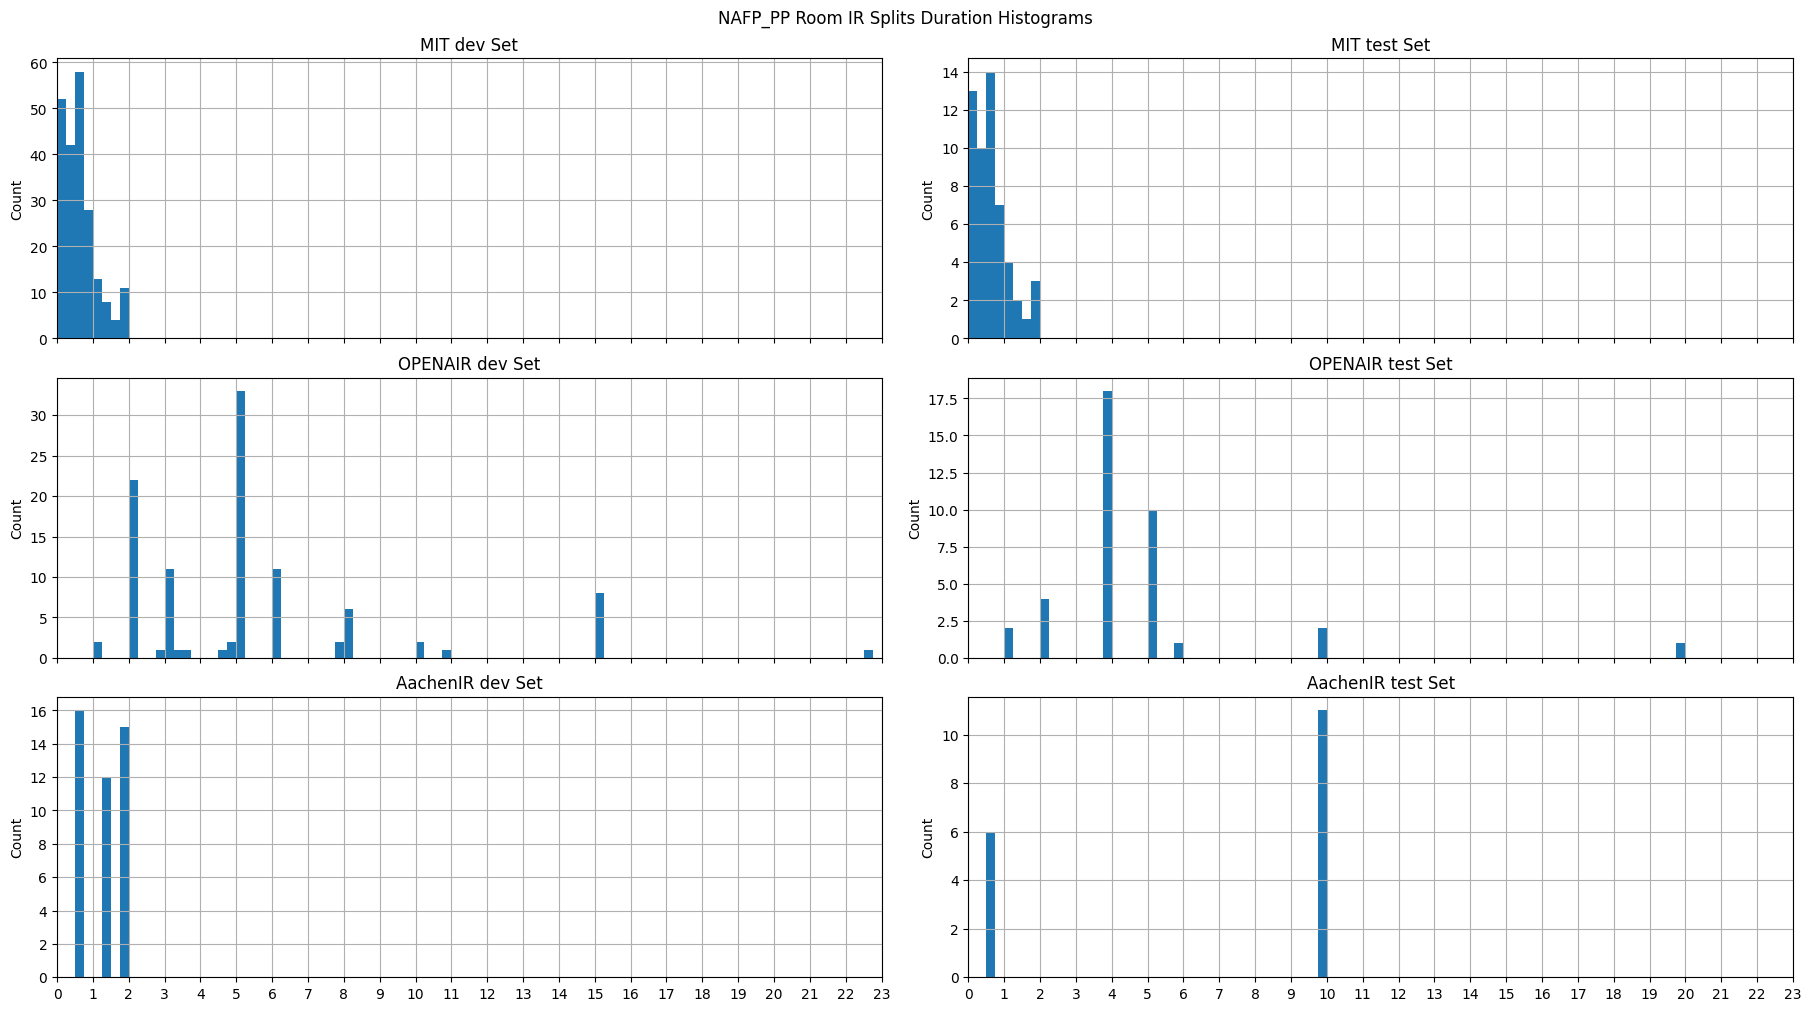

In [15]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 10), constrained_layout=True, sharex=True)
fig.suptitle("NAFP_PP Room IR Splits Duration Histograms")

for row,dataset_name in zip(axs, ["MIT", 'OPENAIR', 'AachenIR']):
    for ax,split_name in zip(row, ["dev", "test"]):
        split_dir = os.path.join(nafp_pp_room_ir_dir, split_name, dataset_name)
        split_paths = sorted(glob(os.path.join(split_dir, "**", "*.wav"), recursive=True))
        split_durations = []
        for ir_path in split_paths:
            ir = audio_processing.load_wav(ir_path, fs=fs)
            split_durations.append(len(ir)/fs)
        split_durations = np.array(split_durations)
        x_max = max(split_durations)
        ax.hist(split_durations, bins=np.arange(0, x_max+0.25, 0.25))
        ax.set_title(f"{dataset_name} {split_name} Set")
        ax.set_xticks(np.arange(0, 24, 1))
        ax.set_xlim([0,23])
        ax.set_ylabel("Count")
        ax.grid()
plt.show()


### Split IRs

In [10]:
from collections import Counter
import shutil

from sklearn.model_selection import train_test_split

##### Aachen IR

In [11]:
aachen_bin_ir_rooms_tr = ['meeting', 'lecture', 'stairway', 'office']
aachen_bin_ir_rooms_ts = ['aula_carolina', 'booth']

#### MIT

In [14]:
mit_ir_durations = []
mit_labels = []
for ir_path in mit_ir_paths:
    ir_len = audio_processing.check_wav_file(ir_path, fs=fs)
    ir_dur = ir_len/fs
    mit_ir_durations.append(ir_dur)
    if ir_dur < 0.25:
        mit_labels.append("0")
    elif ir_dur < 0.5:
        mit_labels.append("1")
    elif ir_dur < 0.75:
        mit_labels.append("2")
    elif ir_dur < 1.0:
        mit_labels.append("3")
    elif ir_dur < 1.25:
        mit_labels.append("4")
    elif ir_dur < 1.5:
        mit_labels.append("5")
    elif ir_dur < 1.75:
        mit_labels.append("6")
    else:
        mit_labels.append("7")

# print("Train")
print(f"There are {len(mit_ir_durations)} IRs")
mit_ir_durations = np.array(mit_ir_durations)

counter = Counter(mit_labels)
print(json.dumps(counter, indent=4))

There are 270 IRs
{
    "1": 52,
    "2": 72,
    "0": 65,
    "4": 17,
    "3": 35,
    "5": 10,
    "7": 14,
    "6": 5
}


In [15]:
mit_train_paths, mit_test_paths = train_test_split(mit_ir_paths, test_size=0.20, random_state=27, stratify=mit_labels)
print(len(mit_train_paths))
print(len(mit_test_paths))

216
54


In [16]:
set(mit_train_paths).intersection(set(mit_test_paths))

set()

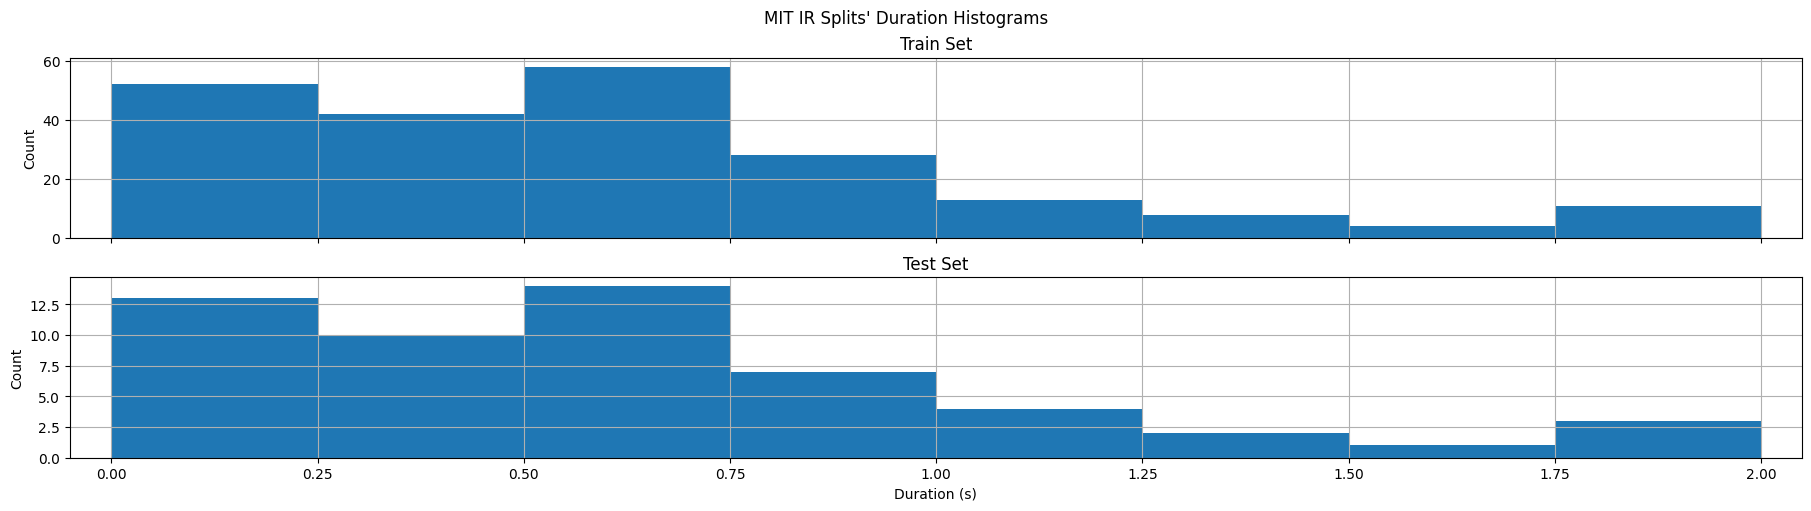

In [19]:
mit_ir_tr_durations = []
for ir_path in mit_train_paths:
    audio_len = audio_processing.check_wav_file(ir_path, fs=fs)
    mit_ir_tr_durations.append(audio_len/fs)

mit_ir_ts_durations = []
for ir_path in mit_test_paths:
    audio_len = audio_processing.check_wav_file(ir_path, fs=fs)
    mit_ir_ts_durations.append(audio_len/fs)

fig, ax = plt.subplots(nrows=2, figsize=(18, 5), constrained_layout=True, sharex=True)
fig.suptitle("MIT IR Splits' Duration Histograms")

x_max = max(max(mit_ir_tr_durations), max(mit_ir_ts_durations))

ax[0].hist(mit_ir_tr_durations, bins=np.arange(0, x_max+0.1, 0.25))
ax[0].set_title("Train Set")

ax[1].hist(mit_ir_ts_durations, bins=np.arange(0, x_max+0.1, 0.25))
ax[1].set_title("Test Set")
ax[1].set_xlabel("Duration (s)")

for _x in ax:
    _x.set_xticks(np.arange(0, x_max+0.05, 0.25))
    _x.set_xlim([0-0.05,x_max+0.05])
    _x.set_ylabel("Count")
    _x.grid()
plt.show()

In [21]:
nafp_pp_room_ir_dir = os.path.join(nafp_pp_dataset_dir, "aug", "room_ir")

new_ir_tr_dir = os.path.join(nafp_pp_room_ir_dir, 'dev', 'MIT')
new_ir_ts_dir = os.path.join(nafp_pp_room_ir_dir, 'test', 'MIT')

os.makedirs(new_ir_tr_dir, exist_ok=True)
os.makedirs(new_ir_ts_dir, exist_ok=True)

for ir_path in mit_train_paths:
    shutil.copy(ir_path, new_ir_tr_dir)

for ir_path in mit_test_paths:
    shutil.copy(ir_path, new_ir_ts_dir)

#### OpenAIR Split by Rooms Stratified by Room duration

In [15]:
open_air_8k_room_durations = []
open_air_8k_labels = []
for room in open_air_8k_rooms:
    room_dir = os.path.join(open_air_8k_dir, room)
    room_paths = sorted(glob(os.path.join(room_dir, "**", "*.wav"), recursive=True))
    _durations = []
    for _path in room_paths:
        audio_len = audio_processing.check_wav_file(_path, fs=fs)
        _durations.append(audio_len/fs)
    min_duration = np.min(_durations).astype(float)
    open_air_8k_room_durations.append(min_duration)
    if min_duration < 3:
        open_air_8k_labels.append("A")
    elif min_duration < 5:
        open_air_8k_labels.append("B")
    elif min_duration < 5.5:
        open_air_8k_labels.append("C")
    elif min_duration < 7:
        open_air_8k_labels.append("D")
    elif min_duration < 16:
        open_air_8k_labels.append("E")
    else:
        open_air_8k_labels.append("F")

for room, duration, label in zip(open_air_8k_rooms, open_air_8k_room_durations, open_air_8k_labels):
    print(f"{room} {duration:.2f} {label}")

elveden-hall-suffolk-england 7.94 E
falkland-palace-royal-tennis-court 4.80 B
gill-heads-mine 5.00 C
hamilton-mausoleum 15.00 E
innocent-railway-tunnel 5.00 C
koli-national-park-summer 5.00 C
koli-national-park-winter 5.00 C
lady-chapel-st-albans-cathedral 6.00 D
maes-howe 1.00 A
r1-nuclear-reactor-hall 19.94 F
saint-lawrence-church-molenbeek-wersbeek-belgium 1.10 A
shrine-and-parish-church-all-saints-north-street-_ 15.00 E
spokane-womans-club 6.00 D
sports-centre-university-york 9.80 E
spring-lane-building-university-york 3.89 B
st-andrews-church 2.00 A
st-margarets-church-ncem-5-piece-band-spatial-measurements 2.00 A
st-matthews-church-walsall 3.00 B
st-patricks-church-patrington 6.00 D
stairway-university-york 3.00 B
terrys-factory-warehouse 22.67 F
terrys-typing-room 5.80 D
trollers-gill 5.00 C
tyndall-bruce-monument 4.80 B
usina-del-arte-symphony-hall 2.90 A
waveguide-web-example-audio 5.00 C
wheldrake-wood 2.00 A
york-minster 10.00 E


In [17]:
counter = Counter(open_air_8k_labels)
print(json.dumps(counter, indent=4))

{
    "E": 5,
    "B": 5,
    "C": 6,
    "D": 4,
    "A": 6,
    "F": 2
}


In [20]:
air_train_rooms, air_test_rooms = train_test_split(open_air_8k_rooms, test_size=0.25, random_state=27, stratify=open_air_8k_labels)
assert set(air_train_rooms).intersection(set(air_test_rooms)) == set()
print(len(air_train_rooms))
print(len(air_test_rooms))

air_ir_train_paths = []
for room in air_train_rooms:
    room_dir = os.path.join(open_air_8k_dir, room)
    room_paths = sorted(glob(os.path.join(room_dir, "**", "*.wav"), recursive=True))
    air_ir_train_paths.extend(room_paths)
print(len(air_ir_train_paths))

air_ir_test_paths = []
for room in air_test_rooms:
    room_dir = os.path.join(open_air_8k_dir, room)
    room_paths = sorted(glob(os.path.join(room_dir, "**", "*.wav"), recursive=True))
    air_ir_test_paths.extend(room_paths)
print(len(air_ir_test_paths))

21
7
105
38


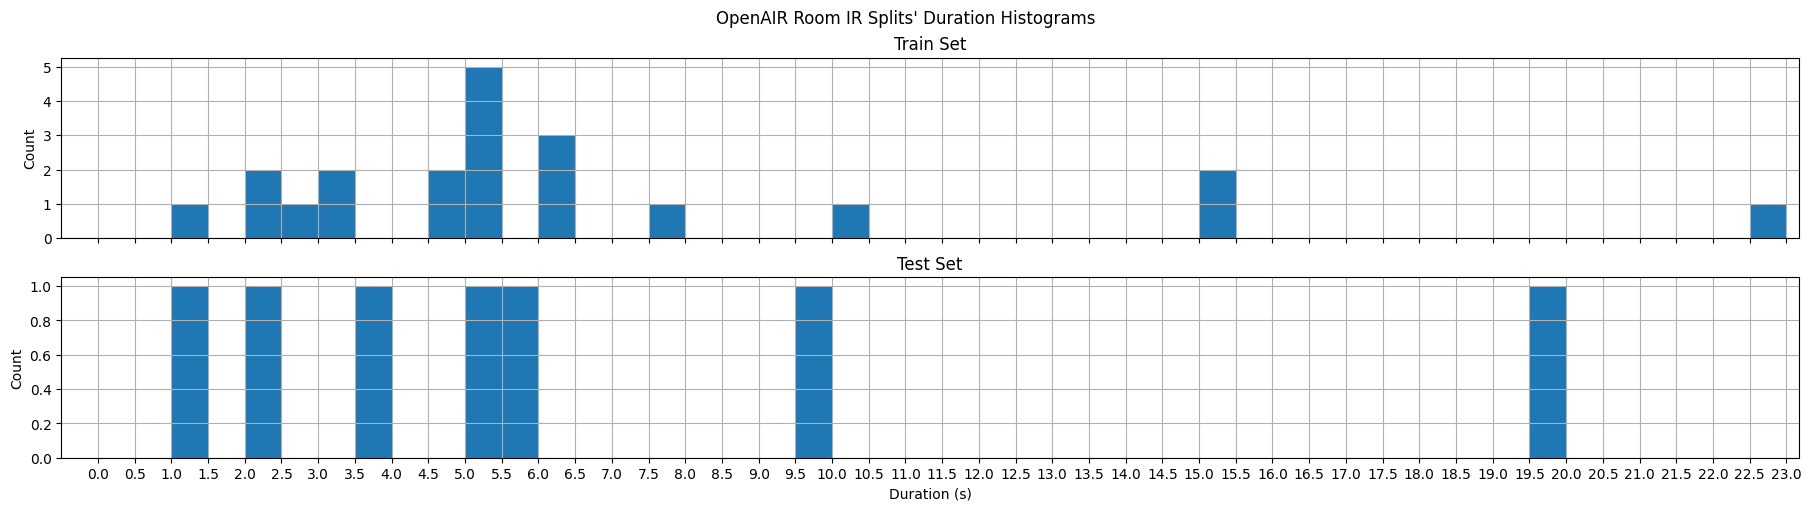

In [21]:
air_tr_room_durations = []
for room in air_train_rooms:
    room_dir = os.path.join(open_air_8k_dir, room)
    room_paths = sorted(glob(os.path.join(room_dir, "**", "*.wav"), recursive=True))
    _durations = []
    for _path in room_paths:
        audio_len = audio_processing.check_wav_file(_path, fs=fs)
        _durations.append(audio_len/fs)
    dur = np.min(_durations)
    air_tr_room_durations.append(dur)

air_ts_room_durations = []
for room in air_test_rooms:
    room_dir = os.path.join(open_air_8k_dir, room)
    room_paths = sorted(glob(os.path.join(room_dir, "**", "*.wav"), recursive=True))
    _durations = []
    for _path in room_paths:
        audio_len = audio_processing.check_wav_file(_path, fs=fs)
        _durations.append(audio_len/fs)
    dur = np.min(_durations)
    air_ts_room_durations.append(dur)

fig, ax = plt.subplots(nrows=2, figsize=(18, 5), constrained_layout=True, sharex=True)
fig.suptitle("OpenAIR Room IR Splits' Duration Histograms")

x_max = max(max(air_tr_room_durations), max(air_ts_room_durations))

ax[0].hist(air_tr_room_durations, bins=np.arange(0, x_max+0.5, 0.5))
ax[0].set_title("Train Set")

ax[1].hist(air_ts_room_durations, bins=np.arange(0, x_max+0.5, 0.5))
ax[1].set_title("Test Set")
ax[1].set_xlabel("Duration (s)")

for _x in ax:
    _x.set_xticks(np.arange(0, x_max+0.5, 0.5))
    _x.set_xlim([0-0.5,x_max+0.5])
    _x.set_ylabel("Count")
    _x.grid()
plt.show()

In [22]:
for room in air_train_rooms:
    room_dir = os.path.join(open_air_8k_dir, room)
    room_paths = sorted(glob(os.path.join(room_dir, "**", "*.wav"), recursive=True))
    print(room, len(room_paths))

lady-chapel-st-albans-cathedral 3
spokane-womans-club 2
falkland-palace-royal-tennis-court 1
stairway-university-york 2
gill-heads-mine 4
york-minster 2
koli-national-park-winter 8
terrys-factory-warehouse 1
st-patricks-church-patrington 6
waveguide-web-example-audio 1
saint-lawrence-church-molenbeek-wersbeek-belgium 2
st-andrews-church 2
hamilton-mausoleum 2
st-margarets-church-ncem-5-piece-band-spatial-measurements 20
shrine-and-parish-church-all-saints-north-street-_ 6
tyndall-bruce-monument 1
trollers-gill 6
elveden-hall-suffolk-england 8
usina-del-arte-symphony-hall 8
st-matthews-church-walsall 6
innocent-railway-tunnel 14


In [23]:
for room in air_test_rooms:
    room_dir = os.path.join(open_air_8k_dir, room)
    room_paths = sorted(glob(os.path.join(room_dir, "**", "*.wav"), recursive=True))
    print(room, len(room_paths))

spring-lane-building-university-york 20
r1-nuclear-reactor-hall 1
koli-national-park-summer 8
sports-centre-university-york 2
terrys-typing-room 1
wheldrake-wood 4
maes-howe 2


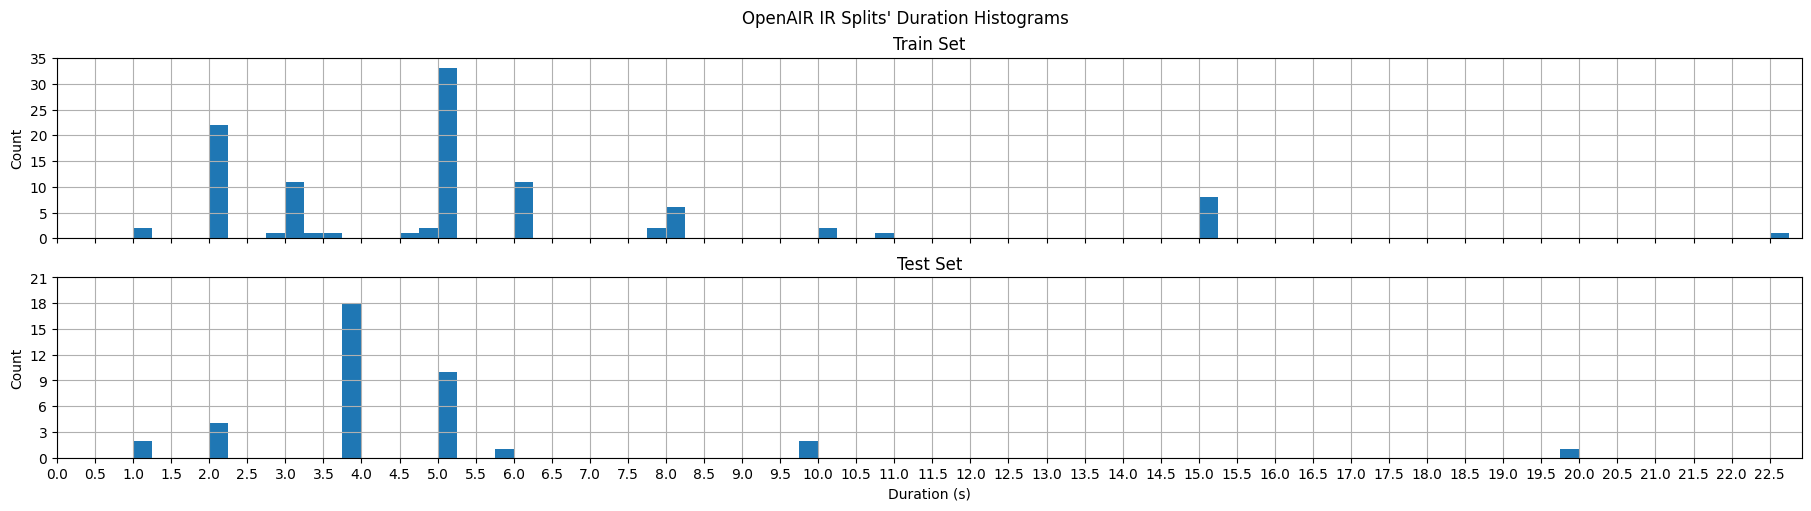

In [24]:
air_ir_tr_durations = []
for ir_path in air_ir_train_paths:
    audio_len = audio_processing.check_wav_file(ir_path, fs=fs)
    air_ir_tr_durations.append(audio_len/fs)
air_ir_tr_durations = np.array(air_ir_tr_durations)

air_ir_ts_durations = []
for ir_path in air_ir_test_paths:
    audio_len = audio_processing.check_wav_file(ir_path, fs=fs)
    air_ir_ts_durations.append(audio_len/fs)
air_ir_ts_durations = np.array(air_ir_ts_durations)

fig, ax = plt.subplots(nrows=2, figsize=(18, 5), constrained_layout=True, sharex=True)
fig.suptitle("OpenAIR IR Splits' Duration Histograms")

x_max = max(max(air_ir_tr_durations), max(air_ir_ts_durations))

ax[0].hist(air_ir_tr_durations, bins=np.arange(0, x_max+0.25, 0.25))
ax[0].set_title("Train Set")
ax[0].set_yticks(np.arange(0, 36, 5))

ax[1].hist(air_ir_ts_durations, bins=np.arange(0, x_max+0.25, 0.25))
ax[1].set_title("Test Set")
ax[1].set_xlabel("Duration (s)")
ax[1].set_yticks(np.arange(0, 22, 3))

for _x in ax:
    _x.set_xticks(np.arange(0, x_max+0.25, 0.5))
    _x.set_xlim([0,x_max+0.25])
    _x.set_ylabel("Count")
    _x.grid()
plt.show()

In [28]:
nafp_pp_room_ir_dir = os.path.join(nafp_pp_dataset_dir, "aug", "room_ir")

new_ir_tr_dir = os.path.join(nafp_pp_room_ir_dir, 'dev', 'OPENAIR')
new_ir_ts_dir = os.path.join(nafp_pp_room_ir_dir, 'test', 'OPENAIR')

os.makedirs(new_ir_tr_dir, exist_ok=True)
os.makedirs(new_ir_ts_dir, exist_ok=True)

for ir_path in air_ir_train_paths:
    structure = os.path.sep.join(ir_path.split(os.path.sep)[-3:-1])
    new_dir = os.path.join(new_ir_tr_dir, structure)
    os.makedirs(new_dir, exist_ok=True)
    shutil.copy(ir_path, new_dir)

for ir_path in air_ir_test_paths:
    structure = os.path.sep.join(ir_path.split(os.path.sep)[-3:-1])
    new_dir = os.path.join(new_ir_ts_dir, structure)
    os.makedirs(new_dir, exist_ok=True)
    shutil.copy(ir_path, new_dir)

#### NAFP IR New Splits

432
There are 432 IRs
77 IRs are shorter than 0.5 s
Min duration: 0.0015 s
Max duration: 23.0108 s
Mean duration: 2.0684 s
Std duration: 2.2052 s
Median duration: 1.7385 s
Total duration: 14.8924 m


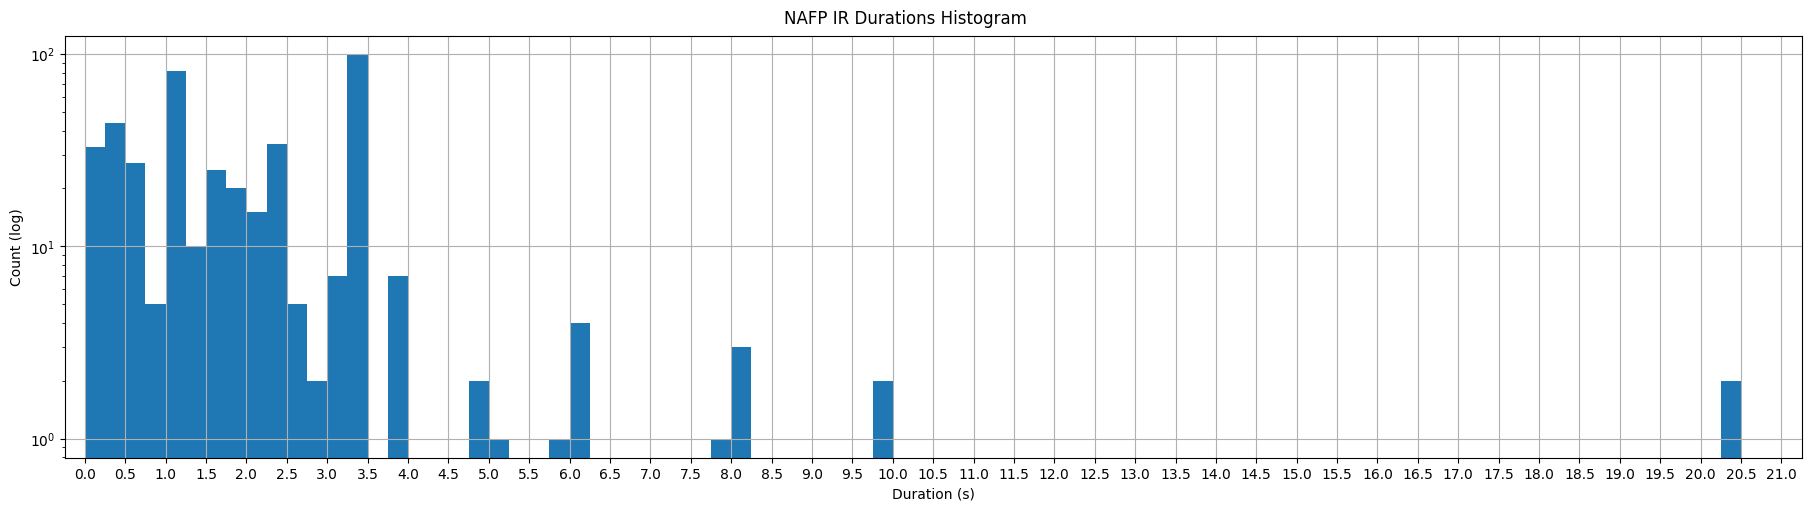

In [35]:
merged_ir_dir = os.path.join(datasets_dir, 'nafp_pp-dataset/aug/ir')
merged_ir_paths = sorted(glob(os.path.join(merged_ir_dir, "*.wav")))
print(len(merged_ir_paths))

T_short = 0.5

ir_merged_durations = []
short_ir_paths = []
for ir_path in merged_ir_paths:
    ir = audio_processing.load_wav(ir_path, fs=fs)
    ir_merged_durations.append(len(ir)/fs)
    if len(ir)/fs < T_short:
        short_ir_paths.append(ir_path)
ir_merged_durations = np.array(ir_merged_durations)

print(f"There are {len(ir_merged_durations)} IRs")
print(f'{len(short_ir_paths)} IRs are shorter than {T_short} s')
print(f"Min duration: {ir_merged_durations.min():.4f} s")
print(f"Max duration: {ir_merged_durations.max():.4f} s")
print(f"Mean duration: {ir_merged_durations.mean():.4f} s")
print(f"Std duration: {ir_merged_durations.std():.4f} s")
print(f"Median duration: {np.median(ir_merged_durations):.4f} s")
# print(f"Mode duration: {stats.mode(ir_merged_durations)[0][0]:.4f} s")
print(f"Total duration: {ir_merged_durations.sum()/60:.4f} m")

fig, ax = plt.subplots(figsize=(18, 5), constrained_layout=True)
fig.suptitle("NAFP IR Durations Histogram")
ax.hist(ir_merged_durations, bins=np.arange(0, 21, 0.25))
ax.set_yscale('log')
ax.set_xticks(np.arange(0, 22, 0.5))
ax.set_xlim([0-0.25,21+0.25])
ax.set_xlabel("Duration (s)")
ax.set_ylabel("Count (log)")
ax.grid()
plt.show()

In [44]:
T_quantization = 0.25

quantized_ir_durations = []
for ir_path in merged_ir_paths:
    ir_len = audio_processing.check_wav_file(ir_path, fs=fs)
    duration = ir_len/fs
    quantized_duration = np.ceil(duration/T_quantization).astype(int)*T_quantization
    quantized_ir_durations.append(quantized_duration)
dur_counter = Counter(quantized_ir_durations)
dur_counter

In [48]:
skipped_paths = []
kept_paths = []
quantized_ir_durations = []
for ir_path in merged_ir_paths:
    ir_len = audio_processing.check_wav_file(ir_path, fs=fs)
    duration = ir_len/fs
    quantized_duration = np.ceil(duration/T_quantization).astype(int)*T_quantization
    if quantized_duration==8 or quantized_duration==6.25 or quantized_duration==23.25:
        skipped_paths.append(ir_path)
        continue
    quantized_ir_durations.append(quantized_duration)
    kept_paths.append(ir_path)

In [49]:
train_paths, test_paths = train_test_split(kept_paths, test_size=0.2, random_state=27, stratify=quantized_ir_durations)

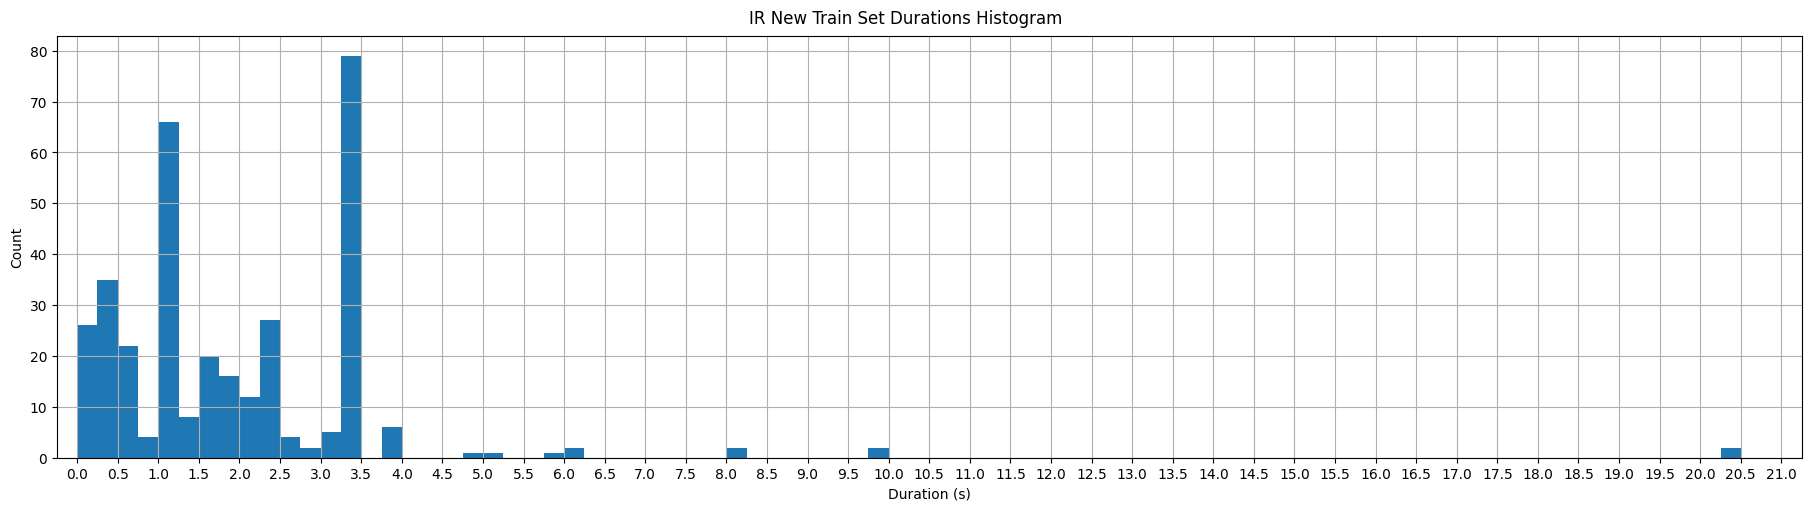

In [59]:
ir_tr_durations = []
for ir_path in train_paths:
    ir = audio_processing.load_wav(ir_path, fs=fs)
    ir_tr_durations.append(len(ir)/fs)
ir_tr_durations = np.array(ir_tr_durations)

fig, ax = plt.subplots(figsize=(18, 5), constrained_layout=True)
fig.suptitle("IR New Train Set Durations Histogram")
ax.hist(ir_tr_durations, bins=np.arange(0, 21, 0.25))
ax.set_xticks(np.arange(0, 22, 0.5))
ax.set_xlim([0-0.25,21+0.25])
ax.set_xlabel("Duration (s)")
ax.set_ylabel("Count")
ax.grid()
plt.show()

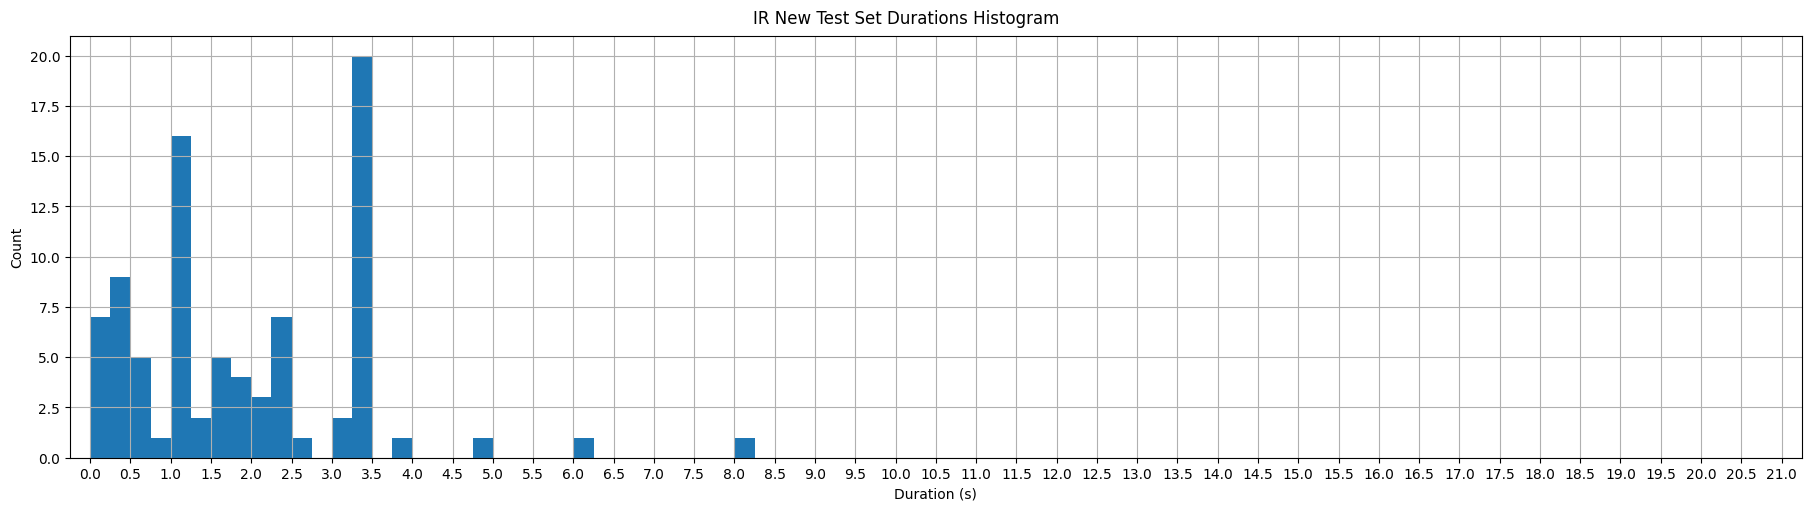

In [58]:
ir_ts_durations = []
for ir_path in test_paths:
    ir = audio_processing.load_wav(ir_path, fs=fs)
    ir_ts_durations.append(len(ir)/fs)
ir_ts_durations = np.array(ir_ts_durations)

fig, ax = plt.subplots(figsize=(18, 5), constrained_layout=True)
fig.suptitle("IR New Test Set Durations Histogram")
ax.hist(ir_ts_durations, bins=np.arange(0, 21, 0.25))
ax.set_xticks(np.arange(0, 22, 0.5))
ax.set_xlim([0-0.25,21+0.25])
ax.set_xlabel("Duration (s)")
ax.set_ylabel("Count")
ax.grid()
plt.show()

In [60]:
for ir_path in skipped_paths:
    print(ir_path)
    ir_len = audio_processing.check_wav_file(ir_path, fs=fs)
    duration = ir_len/fs
    print(duration)

../../datasets/nafp_pp-dataset/aug/ir/18a_smoking_room.wav
7.94
../../datasets/nafp_pp-dataset/aug/ir/spokane_womans_club_ir.wav
6.002
../../datasets/nafp_pp-dataset/aug/ir/terrys_warehouse_stereo.wav
23.01075


In [61]:
test_paths.append(skipped_paths[2])

train_paths.append(skipped_paths[0])
train_paths.append(skipped_paths[1])

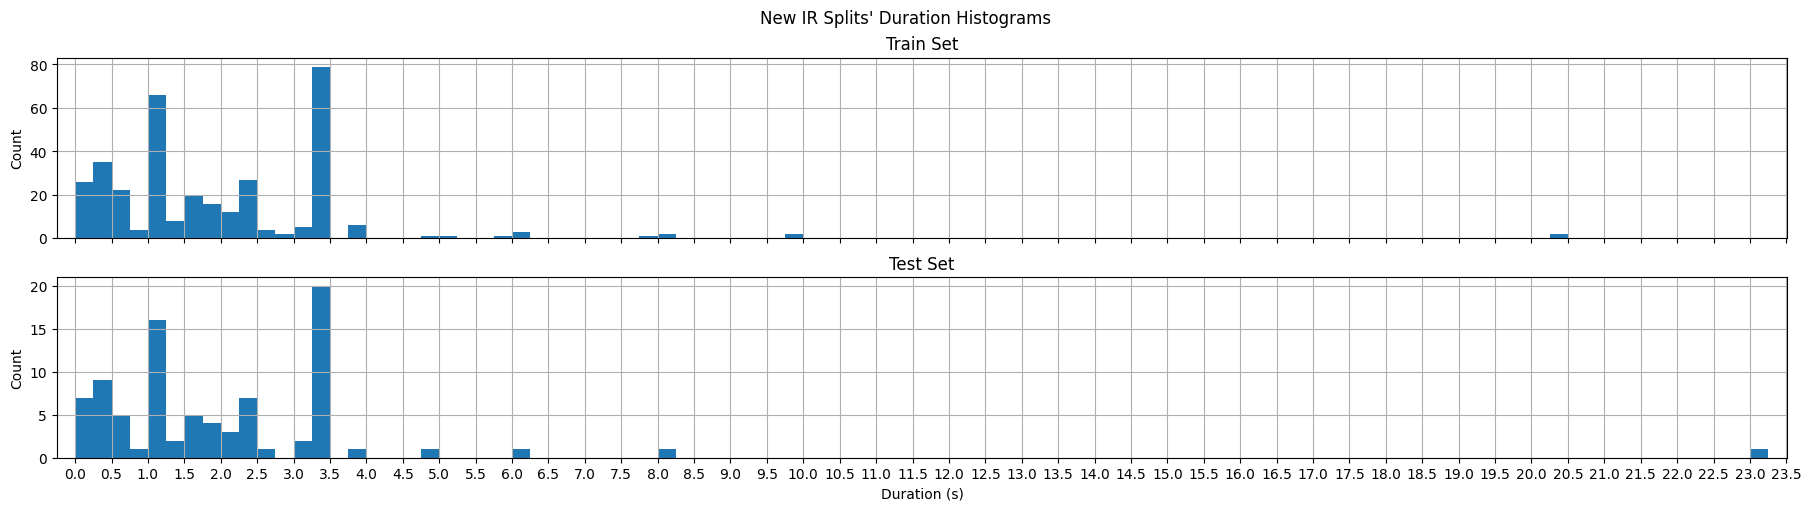

In [70]:
ir_tr_durations = []
for ir_path in train_paths:
    ir = audio_processing.load_wav(ir_path, fs=fs)
    ir_tr_durations.append(len(ir)/fs)
ir_tr_durations = np.array(ir_tr_durations)

ir_ts_durations = []
for ir_path in test_paths:
    ir = audio_processing.load_wav(ir_path, fs=fs)
    ir_ts_durations.append(len(ir)/fs)
ir_ts_durations = np.array(ir_ts_durations)

fig, ax = plt.subplots(nrows=2, figsize=(18, 5), constrained_layout=True, sharex=True)
fig.suptitle("New IR Splits' Duration Histograms")

x_max = max(max(ir_tr_durations), max(ir_ts_durations))

ax[0].hist(ir_tr_durations, bins=np.arange(0, x_max+0.5, 0.25))
ax[0].set_title("Train Set")

ax[1].hist(ir_ts_durations, bins=np.arange(0, x_max+0.5, 0.25))
ax[1].set_title("Test Set")
ax[1].set_xlabel("Duration (s)")

for _x in ax:
    _x.set_xticks(np.arange(0, x_max+0.5, 0.5))
    _x.set_xlim([0-0.25,x_max+0.5])
    _x.set_ylabel("Count")
    _x.grid()
plt.show()

In [71]:
set(train_paths).intersection(set(test_paths))

set()

## Microphone Impulse Response Data

### Microphone Impulse Resonse Dataset

In [47]:
microphone_ir_dataset_dir = os.path.join(datasets_dir, "IR/microphone/Microphone_Impulse_Responses-8khz_16bit/Normalised_IRs")
microphone_direct_distance_names = sorted(os.listdir(microphone_ir_dataset_dir))
print(len(microphone_direct_distance_names))

microphone_direct_names = sorted(list(set([name.split("_")[0] for name in microphone_direct_distance_names])))
print(len(microphone_direct_names))
print('\n'.join(microphone_direct_names))

# microphone_ir_paths = sorted(glob(os.path.join(microphone_ir_dataset_dir, "*.wav")))

115
38
AKGC414Bidirect
AKGC414Cardioid
AKGC414Hyper
AKGC414Omni
AKGC451Cardioid
AKGC451Omni
AKGD112
AKGD12
Coles4038
DPA4006
ElectroVoiceRE20
NTiM2211
NeumannU47FET
NeumannU87AiBidirect
NeumannU87AiCardioid
NeumannU87AiOmni
RodeK2Bidirect
RodeK2Cardioid
RodeK2Omni
RodeNT2ABidirect
RodeNT2ACardioid
RodeNT2AOmni
RodeNTG8
RodeNTR
RodeReporter
RoyerR121
SchoepsCMC5UBidirect
SchoepsCMC5UCardioid
SchoepsCMC5UOmni
SchoepsCMC6
SchoepsCMIT5U
SennheiserMD441
ShureBeta52
ShureSM57
ShureSM58
SonyC800Cardioid
SonyC800Omni
SonyECM670


In [48]:
mic_direct_dict = dict()
for microphone_direct_distance in microphone_direct_distance_names:
    if '_' not in microphone_direct_distance:
        print(microphone_direct_distance)
    else:
        lst = microphone_direct_distance.split("_")
        dst = lst[-1]
        rest = '_'.join(lst[:-1])
        if rest not in mic_direct_dict:
            mic_direct_dict[rest] = []
        mic_direct_dict[rest].append(dst)

In [49]:
mic_direct_dict

{'AKGC414Bidirect': ['125cm', '50cm', '5m'],
 'AKGC414Cardioid': ['125cm', '50cm', '5m'],
 'AKGC414Hyper': ['125cm', '50cm', '5m'],
 'AKGC414Omni': ['125cm', '50cm', '5m'],
 'AKGC451Cardioid': ['125cm', '50cm', '5m'],
 'AKGC451Omni': ['125cm', '50cm', '5m'],
 'AKGD112': ['125cm', '50cm', '5m'],
 'AKGD12': ['125cm', '50cm', '5m'],
 'Coles4038': ['125cm', '50cm', '5m'],
 'DPA4006': ['125cm', '50cm', '5m'],
 'ElectroVoiceRE20': ['125cm', '50cm', '5m'],
 'NTiM2211': ['125cm', '50cm', '5m'],
 'NeumannU47FET': ['125cm', '50cm'],
 'NeumannU87AiBidirect': ['125cm', '50cm', '5m'],
 'NeumannU87AiCardioid': ['125cm', '50cm', '5m'],
 'NeumannU87AiOmni': ['125cm', '50cm', '5m'],
 'RodeK2Bidirect': ['125cm', '50cm', '5m'],
 'RodeK2Cardioid': ['125cm', '50cm', '5m'],
 'RodeK2Omni': ['125cm', '50cm', '5m'],
 'RodeNT2ABidirect': ['125cm', '50cm', '5m'],
 'RodeNT2ACardioid': ['125cm', '50cm', '5m'],
 'RodeNT2AOmni': ['125cm', '50cm', '5m'],
 'RodeNTG8': ['125cm', '5m'],
 'RodeNTR': ['125cm', '50cm', '5m

In [50]:
mic_names = [
    'AKGC414',
    'AKGC451',
    'AKGD112',
    'AKGD12',
    'Coles4038',
    'DPA4006',
    'ElectroVoiceRE20',
    'NTiM2211',
    'NeumannU47FET',
    'NeumannU87Ai',
    'RodeK2',
    'RodeNT2A',
    'RodeNTG8',
    'RodeNTR',
    'RodeReporter',
    'RoyerR121',
    'SchoepsCMC5U',
    'SchoepsCMC6',
    'SchoepsCMIT5U',
    'SennheiserMD441',
    'ShureBeta52',
    'ShureSM57',
    'ShureSM58',
    'SonyC800',
    'SonyECM670',
]

In [51]:
mic_dict = dict()
for mic_name in mic_names:
    mic_dict[mic_name] = []

    for k,v in mic_direct_dict.items():
        if mic_name in k:
            mic_dict[mic_name].append({k:v})

In [19]:
print(json.dumps(mic_dict, indent=4))

{
    "AKGC414": [
        {
            "AKGC414Bidirect": [
                "125cm",
                "50cm",
                "5m"
            ]
        },
        {
            "AKGC414Cardioid": [
                "125cm",
                "50cm",
                "5m"
            ]
        },
        {
            "AKGC414Hyper": [
                "125cm",
                "50cm",
                "5m"
            ]
        },
        {
            "AKGC414Omni": [
                "125cm",
                "50cm",
                "5m"
            ]
        }
    ],
    "AKGC451": [
        {
            "AKGC451Cardioid": [
                "125cm",
                "50cm",
                "5m"
            ]
        },
        {
            "AKGC451Omni": [
                "125cm",
                "50cm",
                "5m"
            ]
        }
    ],
    "AKGD112": [
        {
            "AKGD112": [
                "125cm",
                "50cm",
                "5m"
            ]

In [52]:
mic_ir_dataset_paths = sorted(glob(os.path.join(microphone_ir_dataset_dir, "**", "*.wav"), recursive=True))
print(len(mic_ir_dataset_paths))

8496


#### Analyze Durations

There are 8496 IRs
Min duration: 10.0000 s
Max duration: 10.0000 s
Mean duration: 10.0000 s
Std duration: 0.0000 s
Median duration: 10.0000 s
Total duration: 1416.0000 m
8496 files are longer than 1.0 s
Total duration of these files: 1416.0000 m


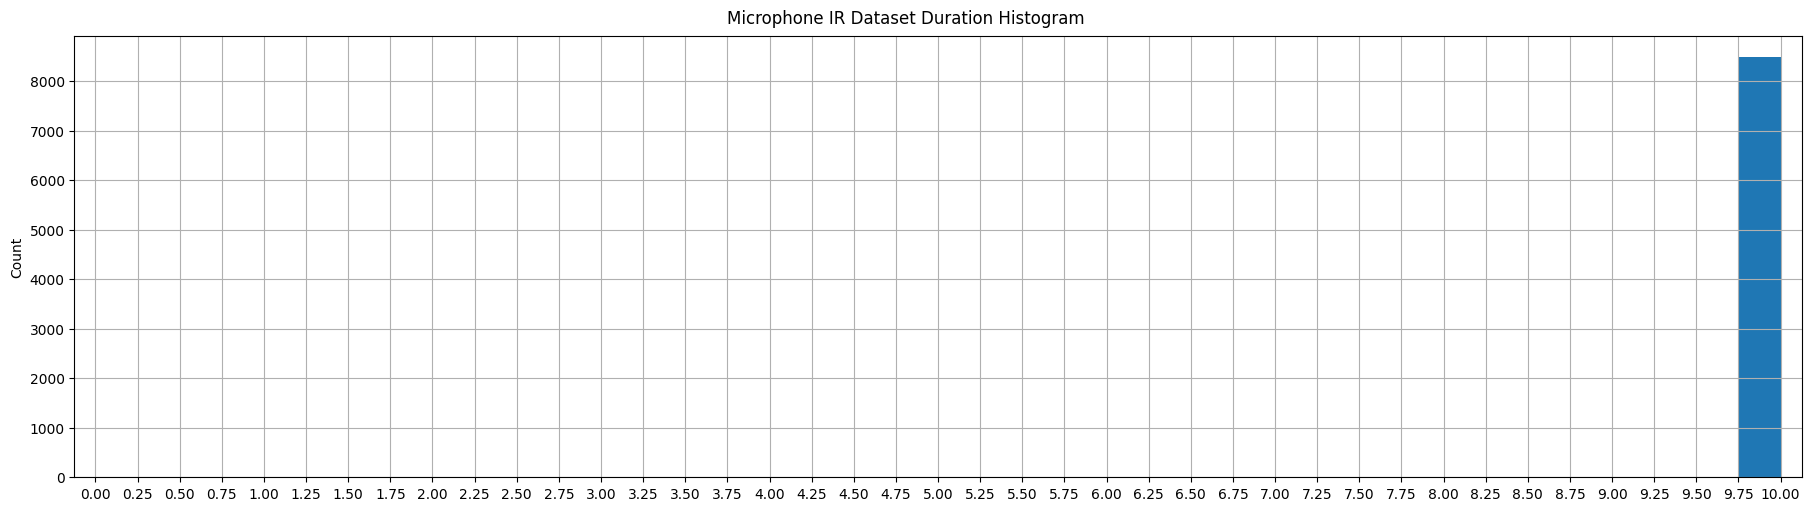

In [53]:
mic_ir_dataset_durations = []
for ir_path in mic_ir_dataset_paths:
    ir_len = audio_processing.check_wav_file(ir_path, fs=fs)
    mic_ir_dataset_durations.append(ir_len/fs)
# print("Train")
print(f"There are {len(mic_ir_dataset_durations)} IRs")
mic_ir_dataset_durations = np.array(mic_ir_dataset_durations)
print(f"Min duration: {mic_ir_dataset_durations.min():.4f} s")
print(f"Max duration: {mic_ir_dataset_durations.max():.4f} s")
print(f"Mean duration: {mic_ir_dataset_durations.mean():.4f} s")
print(f"Std duration: {mic_ir_dataset_durations.std():.4f} s")
print(f"Median duration: {np.median(mic_ir_dataset_durations):.4f} s")
print(f"Total duration: {mic_ir_dataset_durations.sum()/60:.4f} m")

fig, ax = plt.subplots(figsize=(18, 5), constrained_layout=True)
fig.suptitle("Microphone IR Dataset Duration Histogram")

x_max = max(mic_ir_dataset_durations)
delta_t = 0.25

ax.hist(mic_ir_dataset_durations, bins=np.arange(0, x_max+delta_t, delta_t))
# ax.set_title("Train Set")
ax.set_xticks(np.arange(0, x_max+delta_t, delta_t))
ax.set_xlim([0-(delta_t/2),x_max+(delta_t/2)])
ax.set_ylabel("Count")
ax.grid()
plt.show()

#### Listen to the microphones

In [ ]:
audio_path = nafp_music_db_paths[100]
audio = audio_processing.load_wav(audio_path, fs=fs)
print(audio_path)
ipd.display(ipd.Audio(audio, rate=fs))

In [ ]:
m_ir_path = mic_ir_dataset_paths[5005]

print('IR')
print(os.path.basename(m_ir_path))
m_ir = audio_processing.load_wav(m_ir_path, fs=fs)
print(len(m_ir)/fs)
ipd.display(ipd.Audio(m_ir, rate=fs))

print('Music')
ipd.display(ipd.Audio(audio, rate=fs))

print('Music with Microphone')
audio_mic = audio_processing.convolve_with_IR(audio, m_ir)
ipd.display(ipd.Audio(audio_mic, rate=fs))

#### Create Your Split

##### Move files around

In [28]:
import shutil

In [57]:
new_microphone_ir_dataset_dir = os.path.join(os.path.dirname(microphone_ir_dataset_dir), "Normalised_IRs-grouped")
for mic, mic_direction_dcts in mic_dict.items():
    new_mic_dir = os.path.join(new_microphone_ir_dataset_dir, mic)
    for mic_direction_dct in mic_direction_dcts:
        for mic_direction, distances in mic_direction_dct.items():
            new_mic_direct_dir = os.path.join(new_mic_dir, mic_direction)
            for dst in distances:
                new_path = os.path.join(new_mic_direct_dir, f"{mic_direction}_{dst}")
                old_path = os.path.join(microphone_ir_dataset_dir, f"{mic_direction}_{dst}")
                print(old_path)
                print(new_path)
                print()
                # shutil.copytree(old_path, new_path, dirs_exist_ok=True)

../../datasets/IR/microphone/Microphone_Impulse_Responses-8khz_16bit/Normalised_IRs/AKGC414Bidirect_125cm
../../datasets/IR/microphone/Microphone_Impulse_Responses-8khz_16bit/Normalised_IRs-grouped/AKGC414/AKGC414Bidirect/AKGC414Bidirect_125cm

../../datasets/IR/microphone/Microphone_Impulse_Responses-8khz_16bit/Normalised_IRs/AKGC414Bidirect_50cm
../../datasets/IR/microphone/Microphone_Impulse_Responses-8khz_16bit/Normalised_IRs-grouped/AKGC414/AKGC414Bidirect/AKGC414Bidirect_50cm

../../datasets/IR/microphone/Microphone_Impulse_Responses-8khz_16bit/Normalised_IRs/AKGC414Bidirect_5m
../../datasets/IR/microphone/Microphone_Impulse_Responses-8khz_16bit/Normalised_IRs-grouped/AKGC414/AKGC414Bidirect/AKGC414Bidirect_5m

../../datasets/IR/microphone/Microphone_Impulse_Responses-8khz_16bit/Normalised_IRs/AKGC414Cardioid_125cm
../../datasets/IR/microphone/Microphone_Impulse_Responses-8khz_16bit/Normalised_IRs-grouped/AKGC414/AKGC414Cardioid/AKGC414Cardioid_125cm

../../datasets/IR/microphone

##### Delete some degrees

In [66]:
file_names = os.listdir("../../datasets/IR/microphone/Microphone_Impulse_Responses-8khz_16bit/Normalised_IRs-grouped/AKGC414/AKGC414Bidirect/AKGC414Bidirect_125cm/24bit/")
degrees = sorted([int(name.split("_")[-2].replace('Deg', '')) for name in file_names])

In [67]:
degrees

[0,
 5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100,
 105,
 110,
 115,
 120,
 125,
 130,
 135,
 140,
 145,
 150,
 155,
 160,
 165,
 170,
 175,
 180,
 185,
 190,
 195,
 200,
 205,
 210,
 215,
 220,
 225,
 230,
 235,
 240,
 245,
 250,
 255,
 260,
 265,
 270,
 275,
 280,
 285,
 290,
 295,
 300,
 305,
 310,
 315,
 320,
 325,
 330,
 335,
 340,
 345,
 350,
 355]

In [70]:
mir_paths = sorted(glob(os.path.join(new_microphone_ir_dataset_dir, "**", "*.wav"), recursive=True))
print(len(mir_paths))

8496


In [76]:
for mir_path in mir_paths:
    if not os.path.isfile(mir_path):
        continue
    try:
        deg = int(mir_path.split("_")[-2].replace('Deg', ''))
    except ValueError:
        deg = int(os.path.splitext(mir_path)[0].split("_")[-1].replace('Deg', ''))
    except:
        print(mir_path)
        continue
    if deg % 60 != 0:
        os.remove(mir_path)

In [79]:
mir_paths = sorted(glob(os.path.join(new_microphone_ir_dataset_dir, "**", "*.wav"), recursive=True))
# print(len(mir_paths))

degrees_ = []
for mir_path in mir_paths:
    try:
        deg = int(mir_path.split("_")[-2].replace('Deg', ''))
    except ValueError:
        deg = int(os.path.splitext(mir_path)[0].split("_")[-1].replace('Deg', ''))
    except:
        print(mir_path)
        continue
    degrees_.append(deg)
degrees_ = set(degrees_)

In [81]:
len(mir_paths)

708

##### Split to Dev and Eval

In [83]:
from sklearn.model_selection import train_test_split

In [85]:
train_mir_names, test_mir_names = train_test_split(mic_names, test_size=0.2, random_state=27)

In [88]:
train_mir_paths = []
for mic_name in train_mir_names:
    train_mir_paths.extend(sorted(glob(os.path.join(new_microphone_ir_dataset_dir, mic_name, "**", "*.wav"), recursive=True)))
print(len(train_mir_paths))

test_mir_paths = []
for mic_name in test_mir_names:
    test_mir_paths.extend(sorted(glob(os.path.join(new_microphone_ir_dataset_dir, mic_name, "**", "*.wav"), recursive=True)))
print(len(test_mir_paths))

564
144


In [90]:
new_microphone_ir_dataset_dir_tr = os.path.join(nafp_pp_dataset_dir, 'aug', 'microphone_ir', 'dev')
new_microphone_ir_dataset_dir_ts = os.path.join(nafp_pp_dataset_dir, 'aug', 'microphone_ir', 'test')
os.makedirs(new_microphone_ir_dataset_dir_tr, exist_ok=True)
os.makedirs(new_microphone_ir_dataset_dir_ts, exist_ok=True)

for mic_name in train_mir_names:
    mic_dir = os.path.join(new_microphone_ir_dataset_dir, mic_name)
    shutil.copytree(mic_dir, os.path.join(new_microphone_ir_dataset_dir_tr, mic_name), dirs_exist_ok=True)

for mic_name in test_mir_names:
    mic_dir = os.path.join(new_microphone_ir_dataset_dir, mic_name)
    # shutil.copytree(mic_dir, os.path.join(new_microphone_ir_dataset_dir_ts, mic_name), dirs_exist_ok=True)

../../datasets/IR/microphone/Microphone_Impulse_Responses-8khz_16bit/Normalised_IRs-grouped/RodeNTG8
../../datasets/IR/microphone/Microphone_Impulse_Responses-8khz_16bit/Normalised_IRs-grouped/NeumannU87Ai
../../datasets/IR/microphone/Microphone_Impulse_Responses-8khz_16bit/Normalised_IRs-grouped/ShureSM57
../../datasets/IR/microphone/Microphone_Impulse_Responses-8khz_16bit/Normalised_IRs-grouped/AKGC414
../../datasets/IR/microphone/Microphone_Impulse_Responses-8khz_16bit/Normalised_IRs-grouped/RoyerR121
../../datasets/IR/microphone/Microphone_Impulse_Responses-8khz_16bit/Normalised_IRs-grouped/AKGD12
../../datasets/IR/microphone/Microphone_Impulse_Responses-8khz_16bit/Normalised_IRs-grouped/ElectroVoiceRE20
../../datasets/IR/microphone/Microphone_Impulse_Responses-8khz_16bit/Normalised_IRs-grouped/Coles4038
../../datasets/IR/microphone/Microphone_Impulse_Responses-8khz_16bit/Normalised_IRs-grouped/ShureSM58
../../datasets/IR/microphone/Microphone_Impulse_Responses-8khz_16bit/Normalise